<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/Desafio_INDICIUM/An%C3%A1lise_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#             **DESAFIO INDICIUM**

Nesta análise de dados, foi apresentado o dataset chamado (yearly_wage) composto por 32560 linhas, 14 colunas de informação (features) e a variável alvo nomeada como (“yearly_wage”). As 14 colunas são nomeadas como:


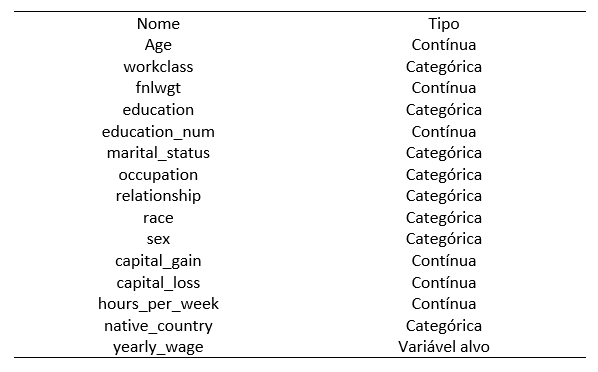

O objetivo desta análise foi utilizar a biblioteca Sweetviz para uma análise preliminar, a biblioteca fornece uma análise geral das relações entre as features.


In [69]:
#bibliotecas básicas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
treino = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/Desafio_INDICIUM/wage_train.csv')

#Para que eu possa fazer uma análise preliminar dos dados utilizando o sweetviz
#Preciso transformar minha variavel alvo em um valor numérico
treino['yearly_wage'] = treino['yearly_wage'].map({' <=50K': 1, ' >50K': 0})
treino = treino.drop('Unnamed: 0', axis = 1)
treino.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


# Sweetviz

In [3]:
#Para ser possível uma análise com a biblioteca sweetviz, devemos fazer a instalação.
#É preciso informar os dados que serão analisados em 'source' e informar qual a variavel alvo 'target_feat'
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)


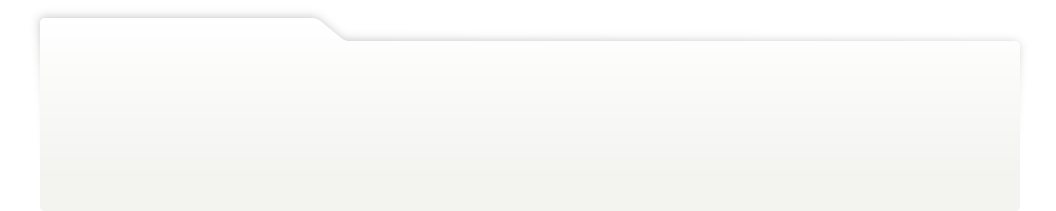
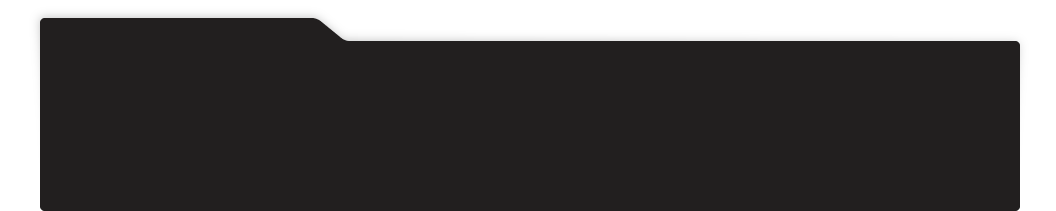
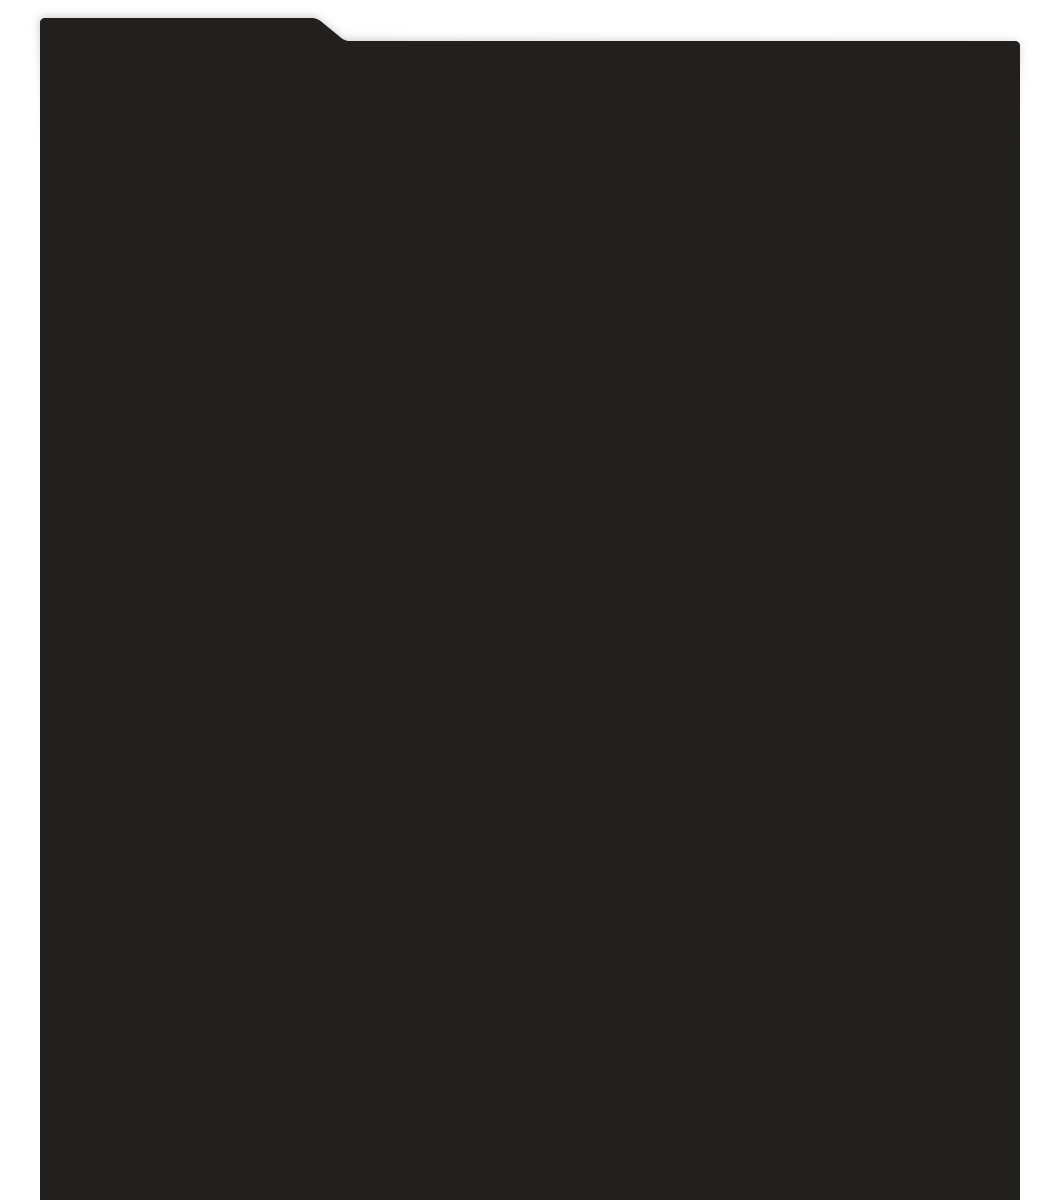
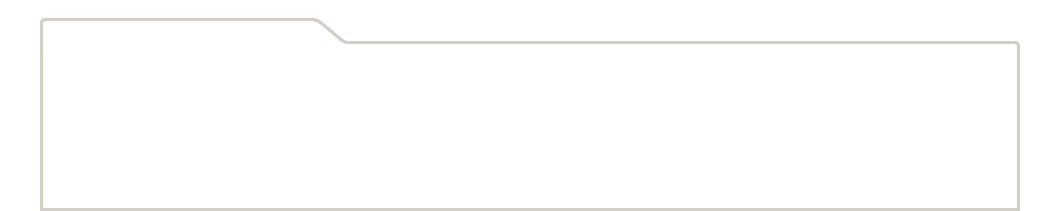
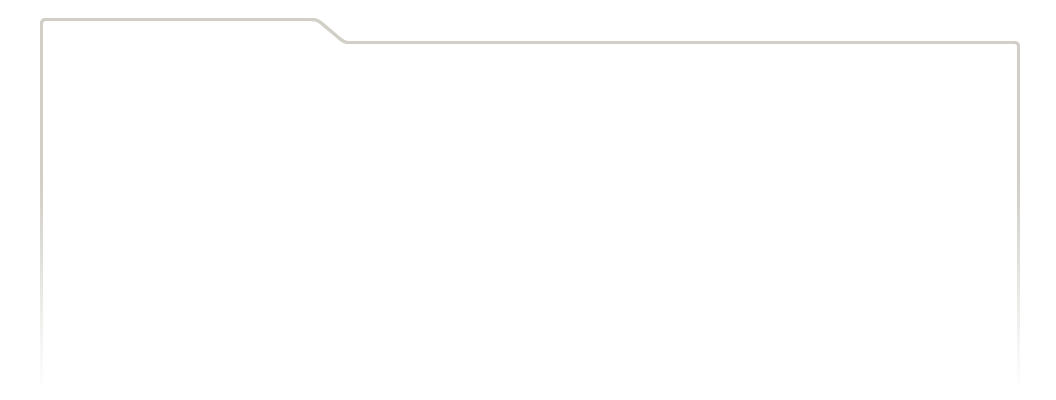
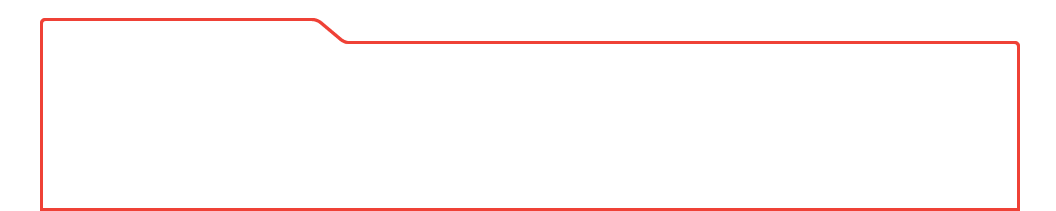
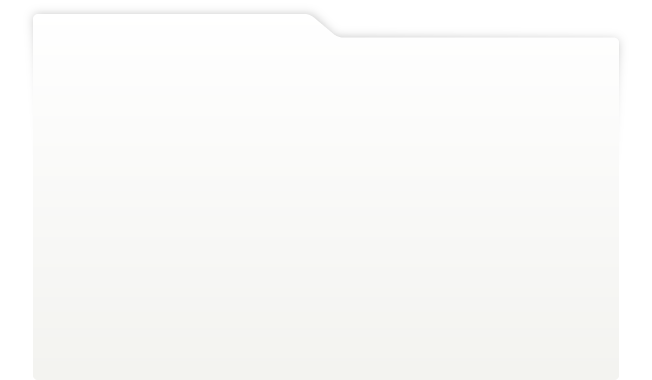
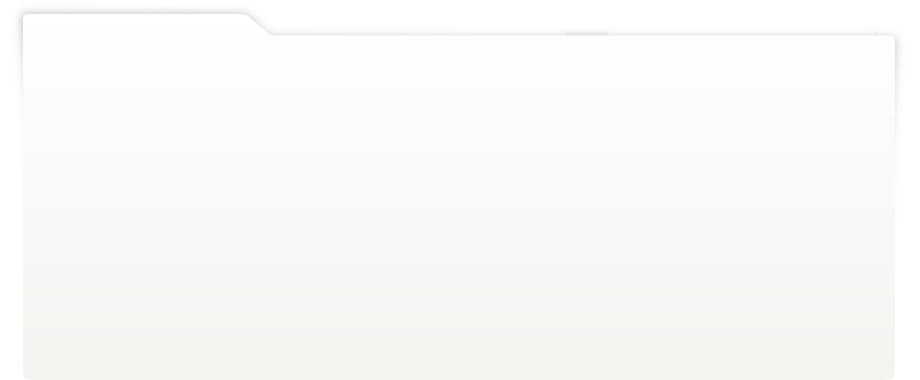
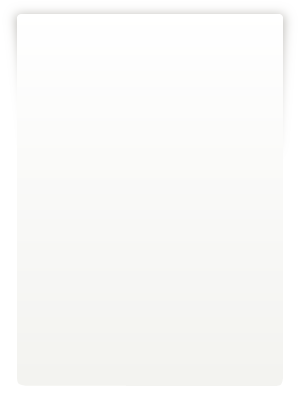
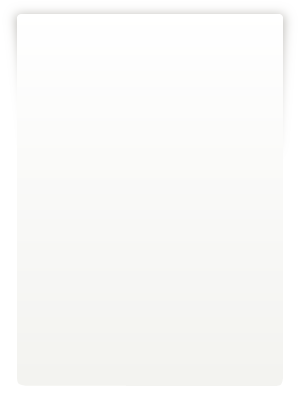
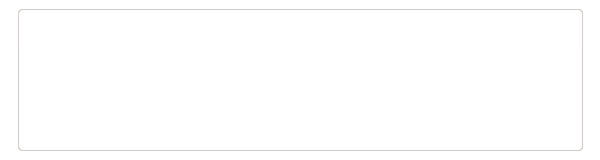
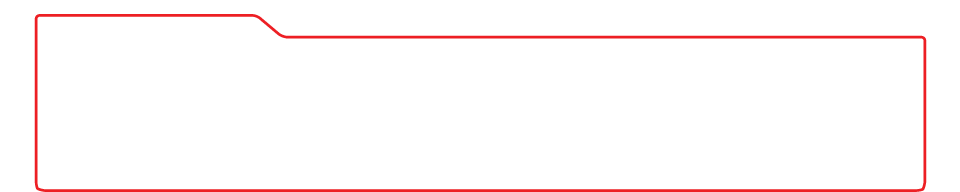
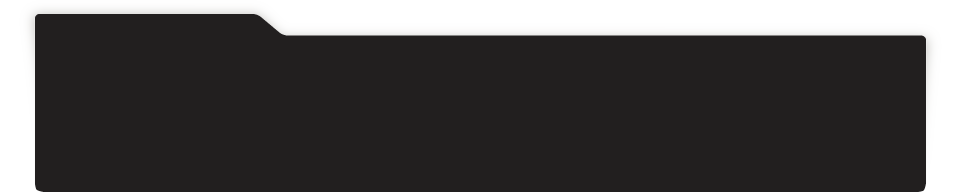
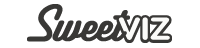
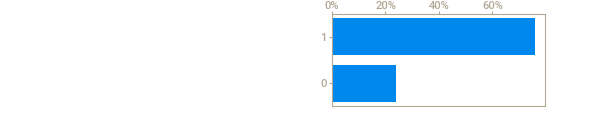
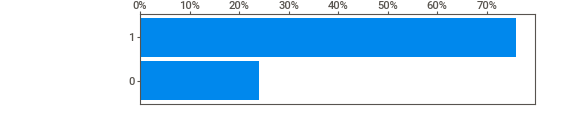
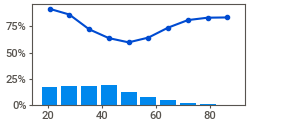
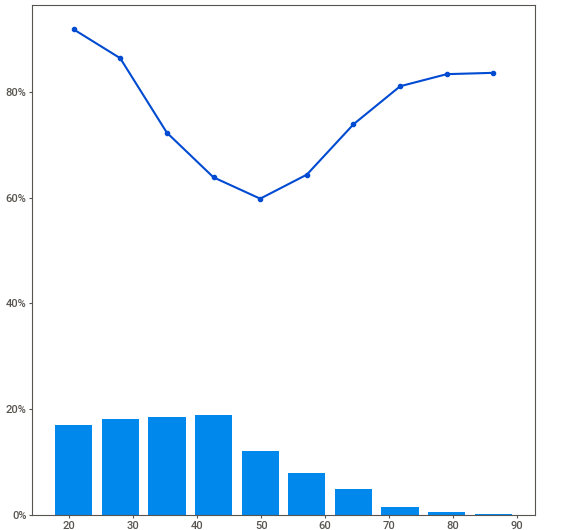
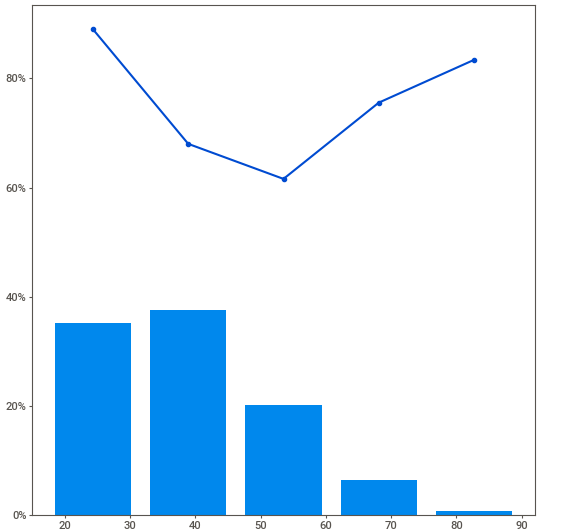
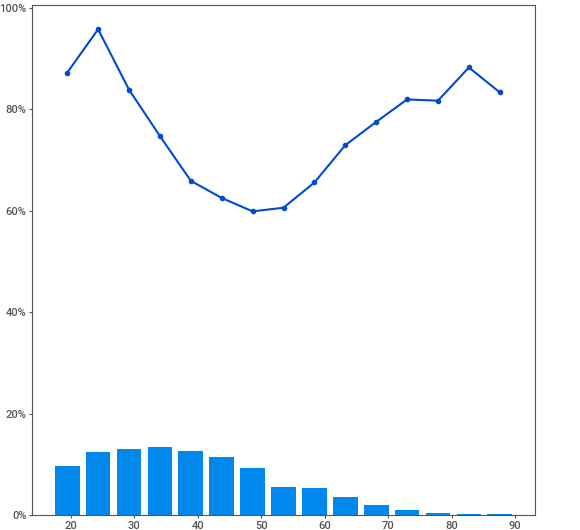
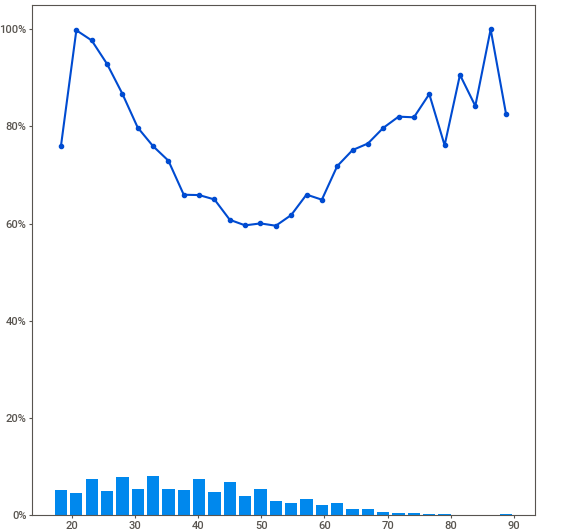
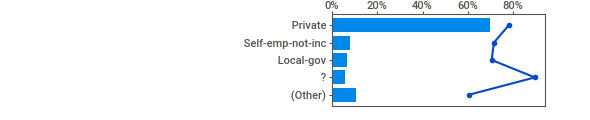
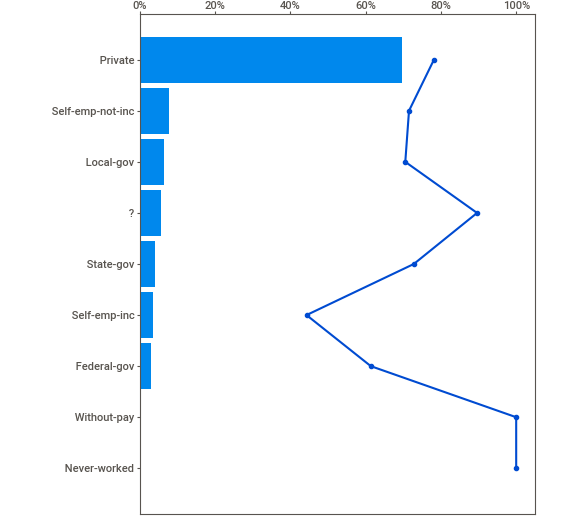
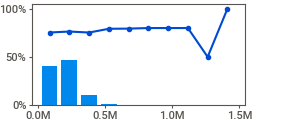
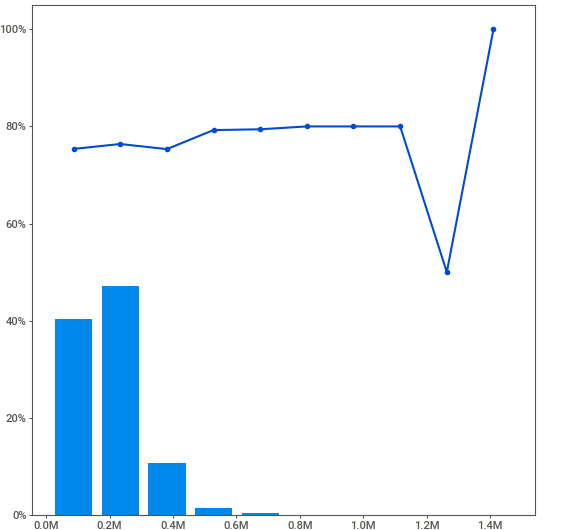
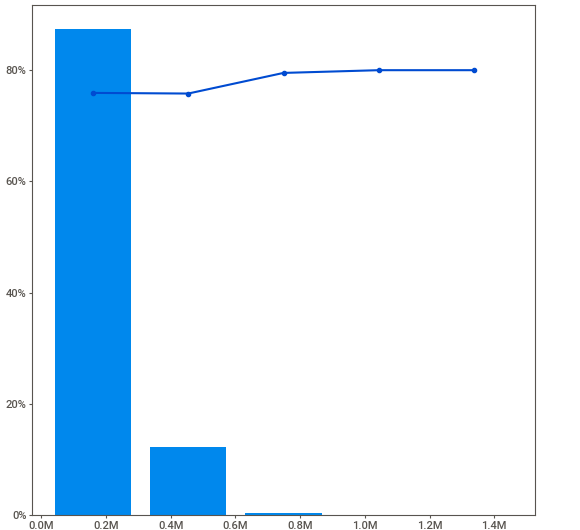
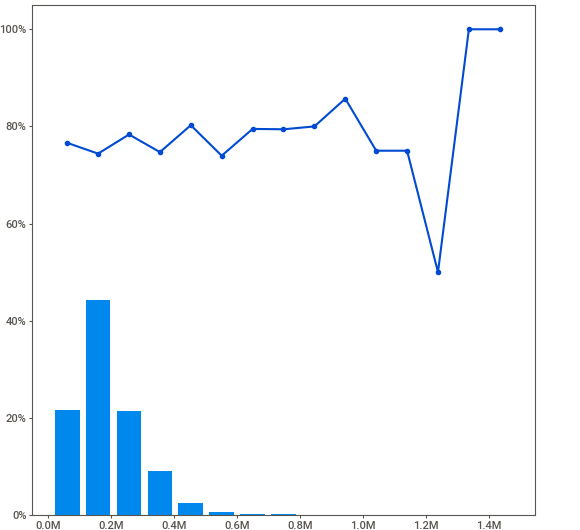
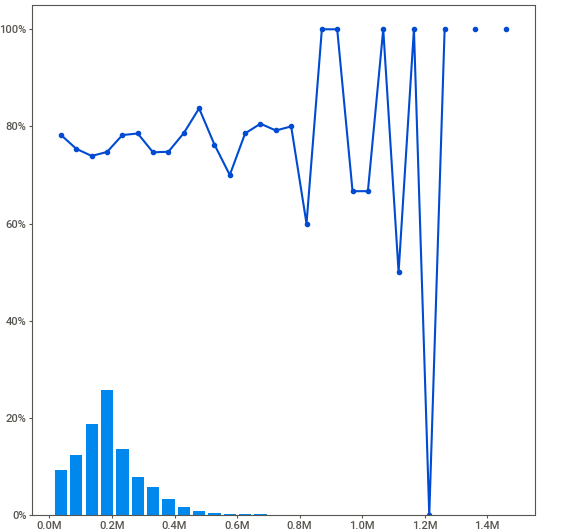
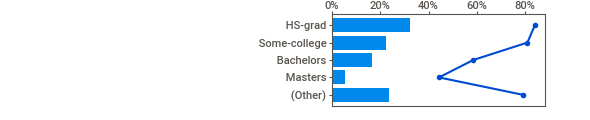
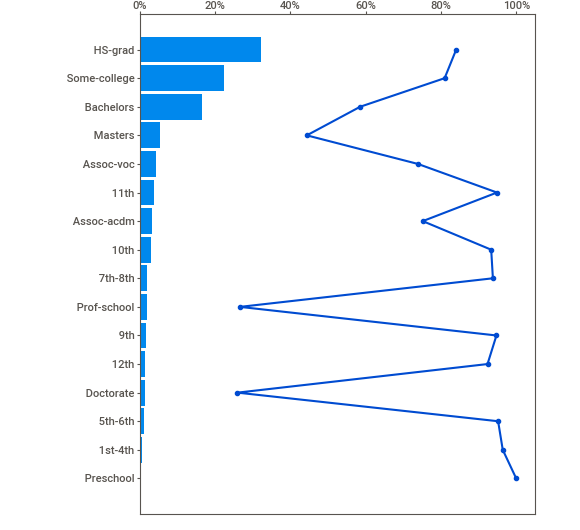
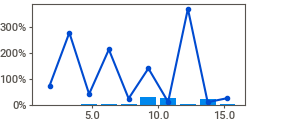
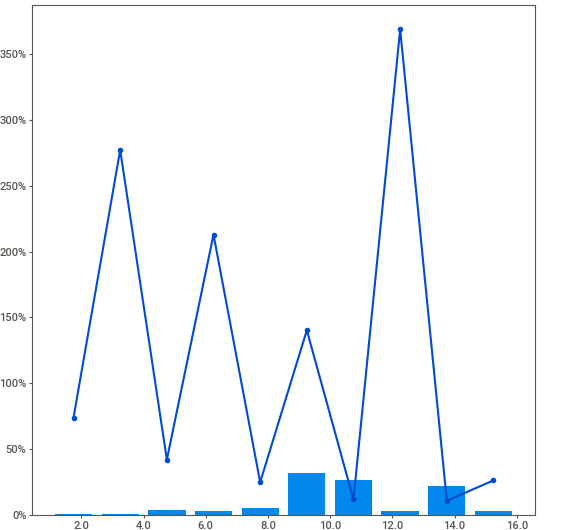
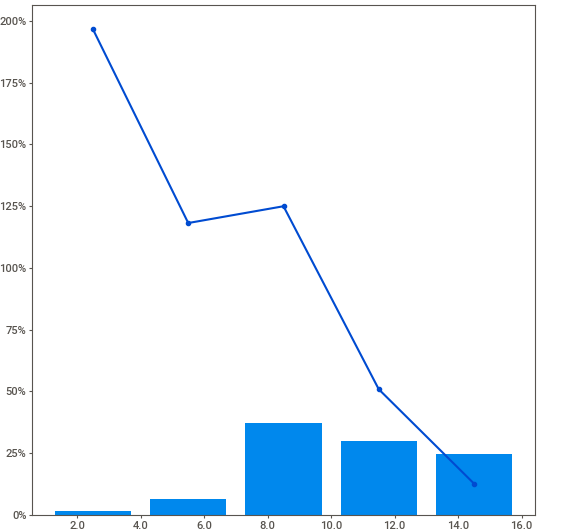
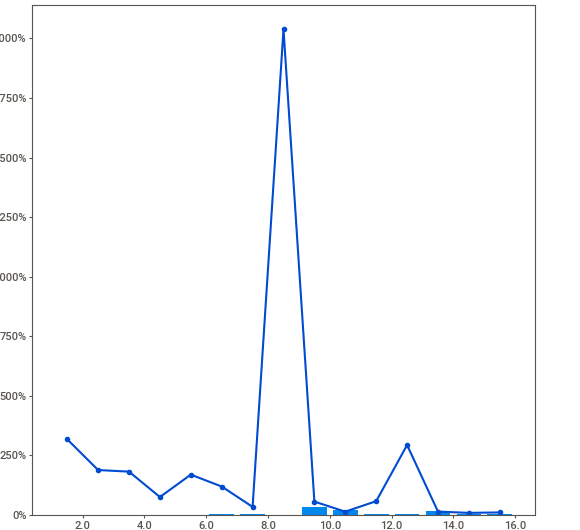
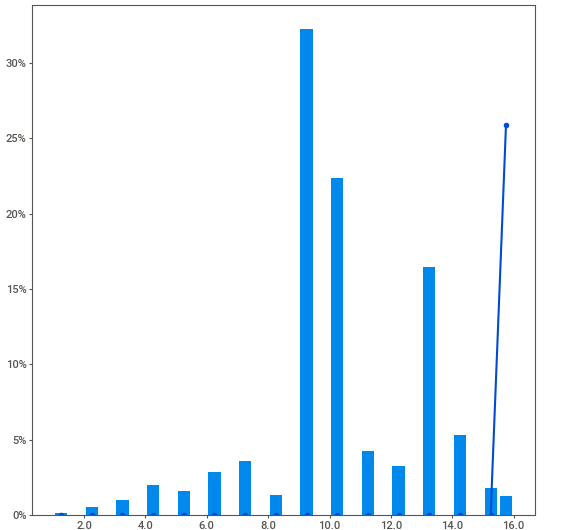
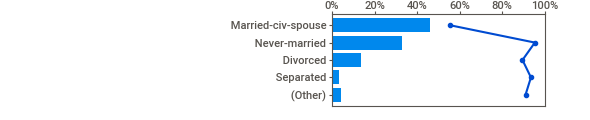
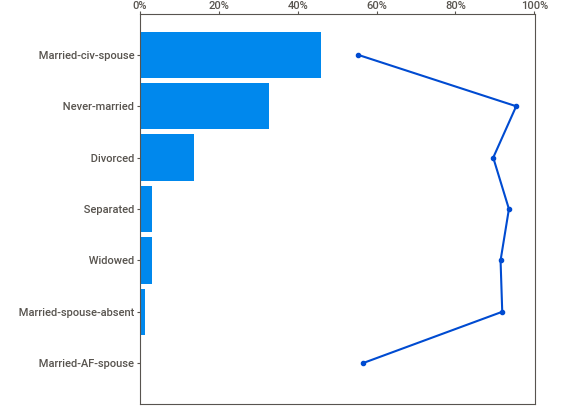
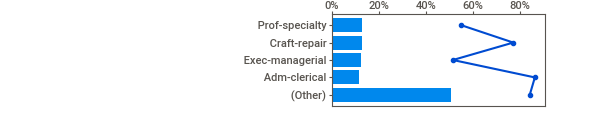
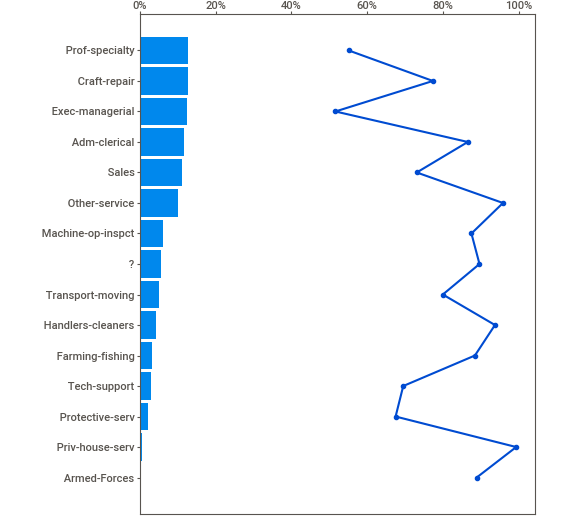
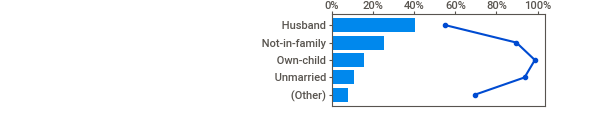
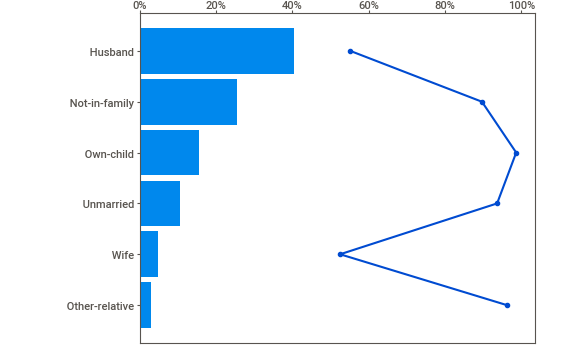
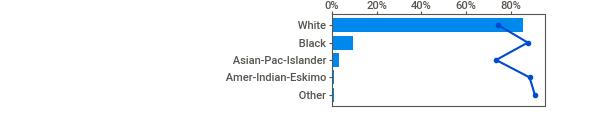
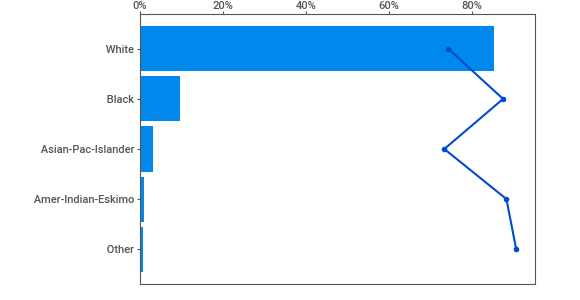
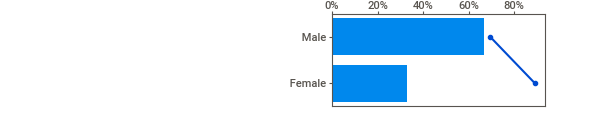
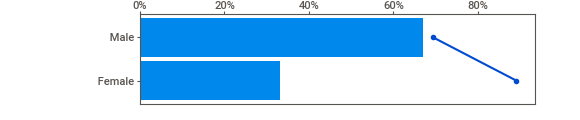
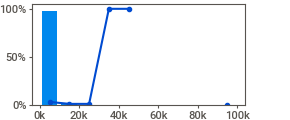
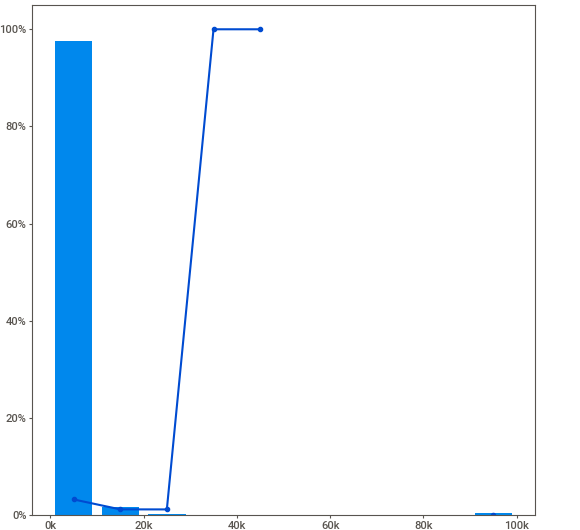
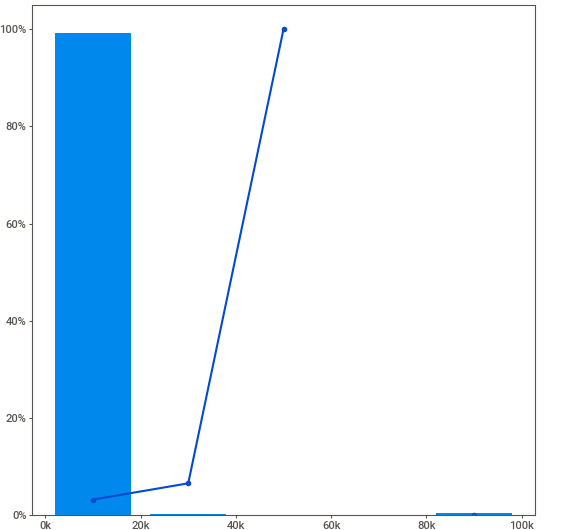
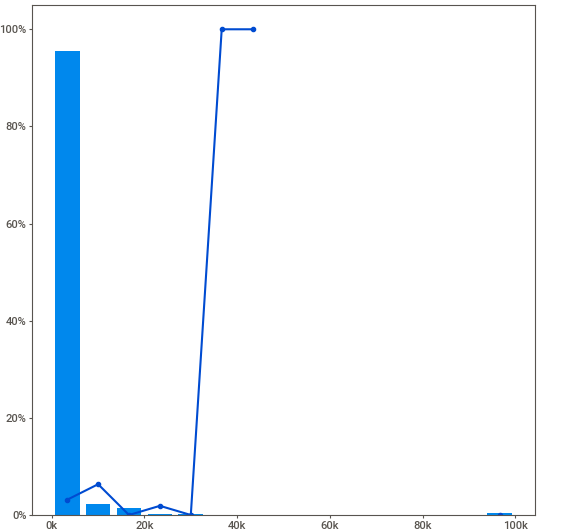
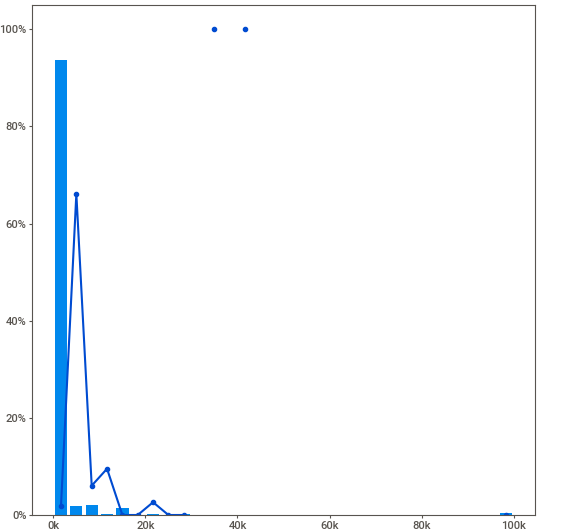
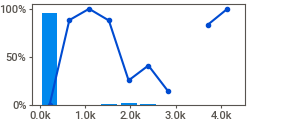
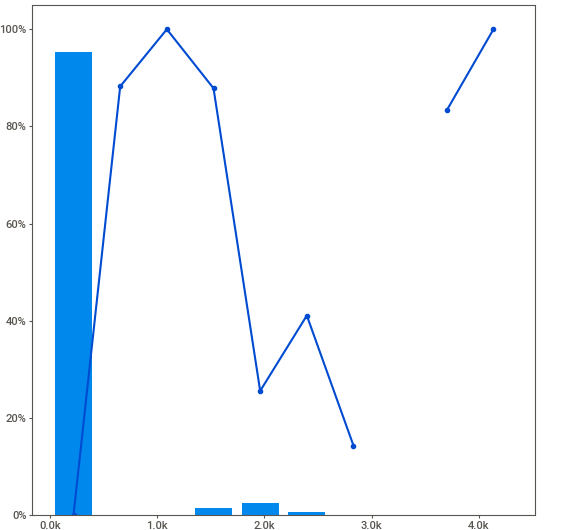
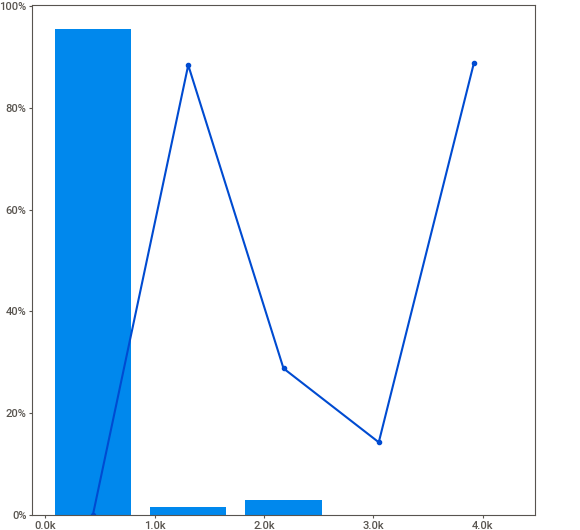
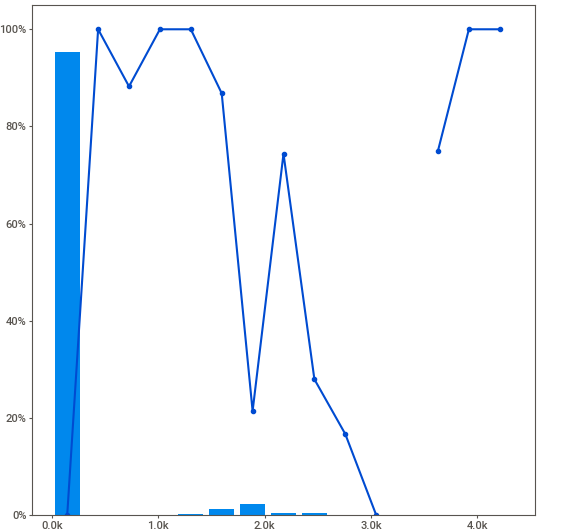
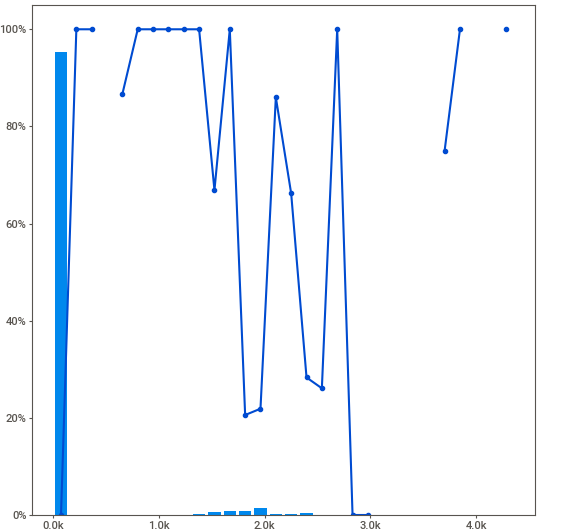
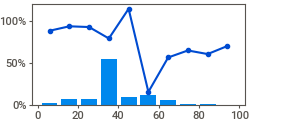
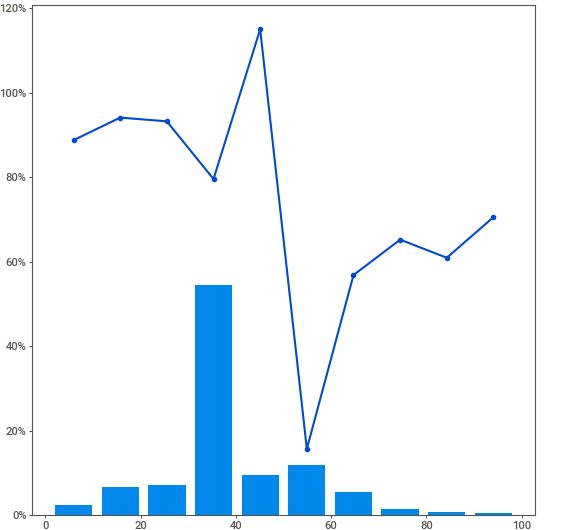
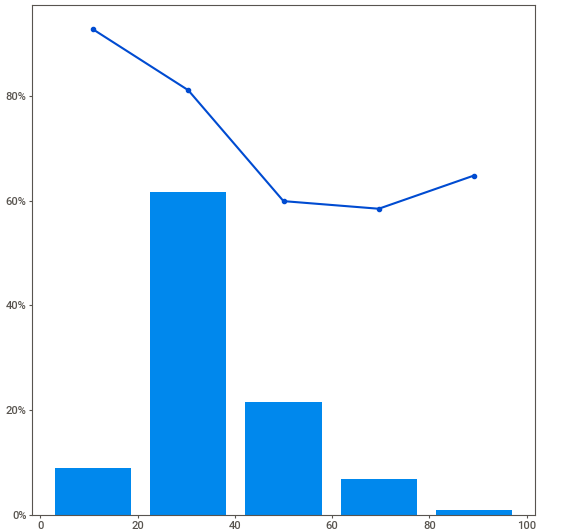
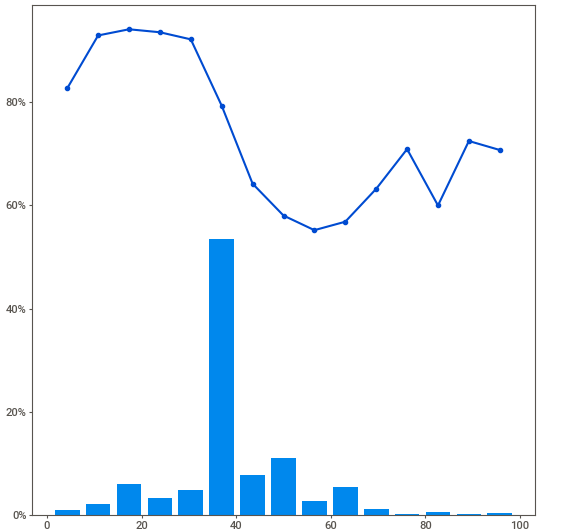
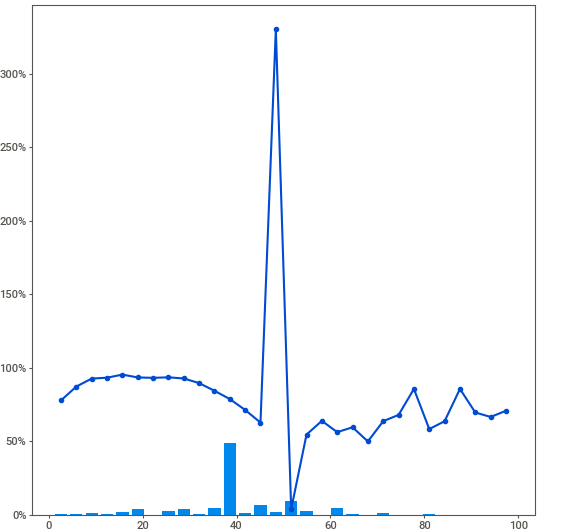
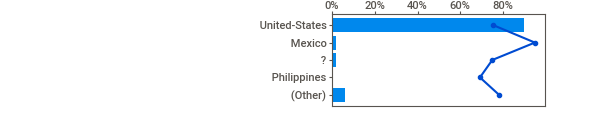
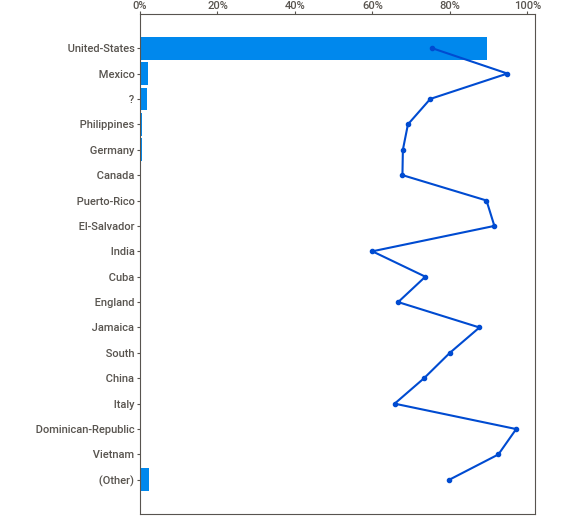
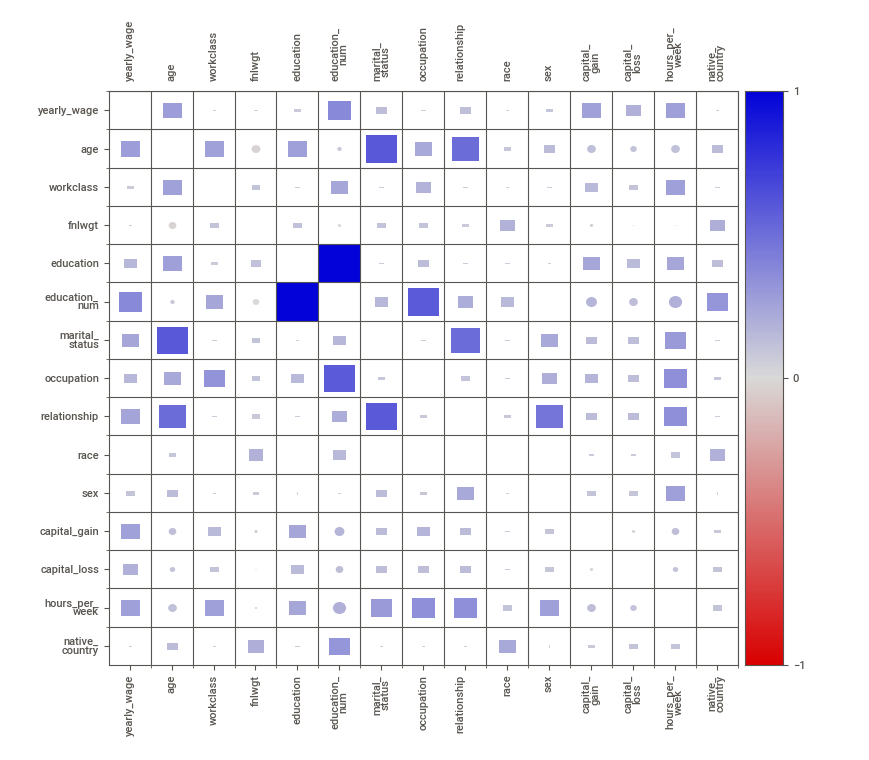
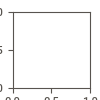

In [4]:
eda = sv.analyze(source = treino, target_feat = 'yearly_wage')
eda.show_notebook()

# Análise preliminar


após foi utilizado a biblioteca Missingno a biblioteca fornece como resposta o mesmo que o comando isnull do pandas, porém de uma forma gráfica, o que torna a visualização mais interessante.

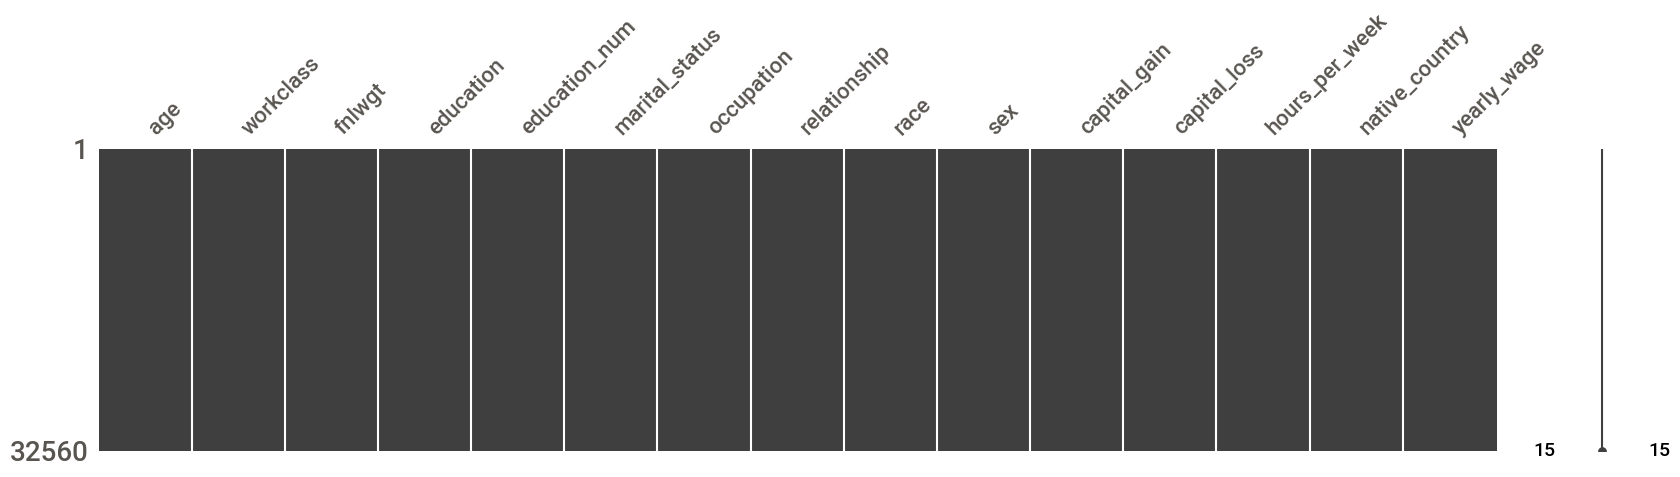

In [68]:
import missingno as msno
msno.matrix(treino,figsize=(20,4));

Podemos ver que nõa temos dados faltantes neste banco de dados,
o que é exelente, não será preciso se preocupar com métodos para imputar novos dados.

# Distruibuição das variáveis contínuas 
Foi realizada a plotagem de gráficos dos histogramas e das distribuições das features, a fim de compreender nossa base de dados, o histograma foi plotado em cima das nossas duas classes alvo (<=50K e >50k). Como podemos ver abaixo os gráficos gerados com a análise.


**Distribuição variável alvo pela variável age**

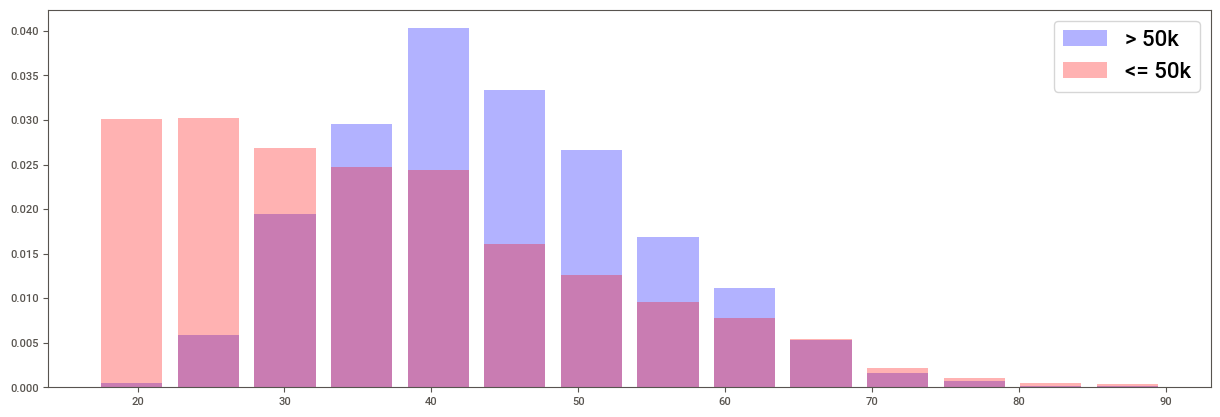

In [66]:
fig = plt.figure(figsize=(15,5))

minimo = treino.age.min()
maximo = treino.age.max()
nbins=15
bins = np.linspace(minimo,maximo,nbins)

plt.hist(treino.loc[treino.yearly_wage==0].age, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(treino.loc[treino.yearly_wage==1].age, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16);


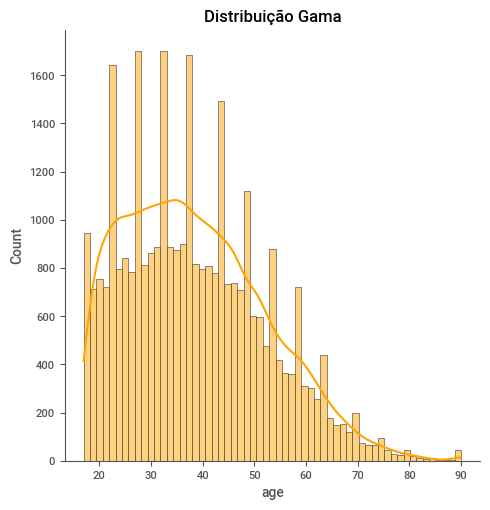

In [67]:
fig = sns.displot(treino['age'], kde = True,  color = 'orange').set(title='Distribuição Gama');

Podemos ver que a maioria dos indíviduos possui 40 anos, e que a distribuição dos dados para o salário anual
Segue semelhante para indviduos das duas classes, com exceção para indivíduos com menos de 30 anos
Os quais possuem salário anual menor oou igual a 50 mil (<=50K)

**Distribuição variável alvo pela variável fnlwgt**

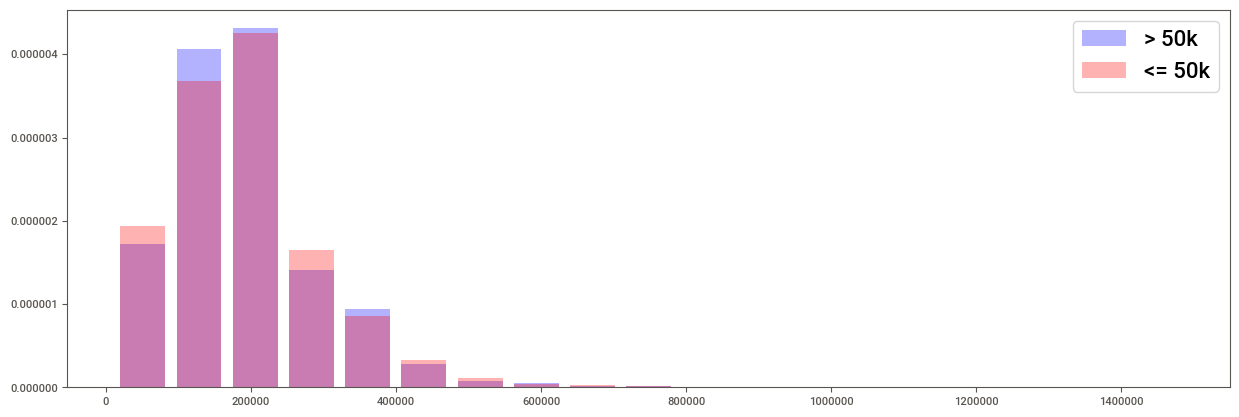

In [8]:
plt.figure(figsize=(15,5))

minimo = treino.fnlwgt.min()
maximo = treino.fnlwgt.max()
nbins=20
bins = np.linspace(minimo,maximo,nbins)

plt.hist(treino.loc[treino.yearly_wage==0].fnlwgt, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(treino.loc[treino.yearly_wage==1].fnlwgt, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16);


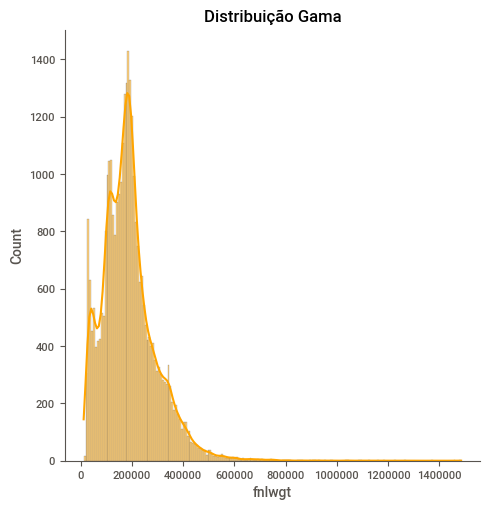

In [45]:
sns.displot(treino['fnlwgt'], kde = True, color = 'orange').set(title='Distribuição Gama');

Podemos ver que a grnade maioria dos indíviduos possuem reda menor que 1 Milhão, possuímos alguns outliers com rendas muito altas 
O que pode ser feito é a união desses valores em classes

**Distribuição variável alvo pela variável education_num**

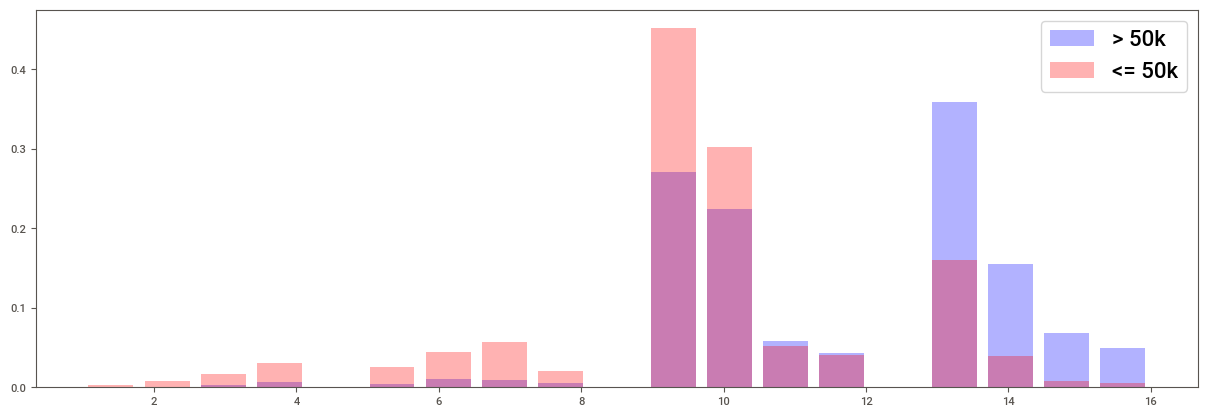

In [9]:
plt.figure(figsize=(15,5))

minimo = treino.education_num.min()
maximo = treino.education_num.max()
nbins=20
bins = np.linspace(minimo,maximo,nbins)

plt.hist(treino.loc[treino.yearly_wage==0].education_num, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(treino.loc[treino.yearly_wage==1].education_num, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16);


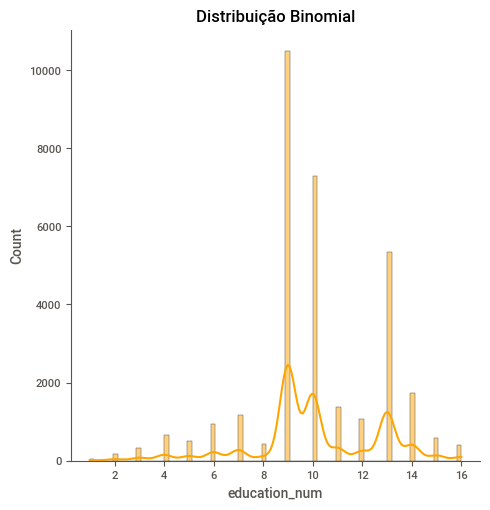

In [47]:
sns.displot(treino['education_num'], kde = True, color = 'orange').set(title='Distribuição Binomial');

Podemos ver que a maoria dos indivíduos possuem valores acima de 8 para Education_num,
E que a distribuição para as duas classes é bastante semelhantes.

**Distribuição variável alvo pela variável capital_gain**

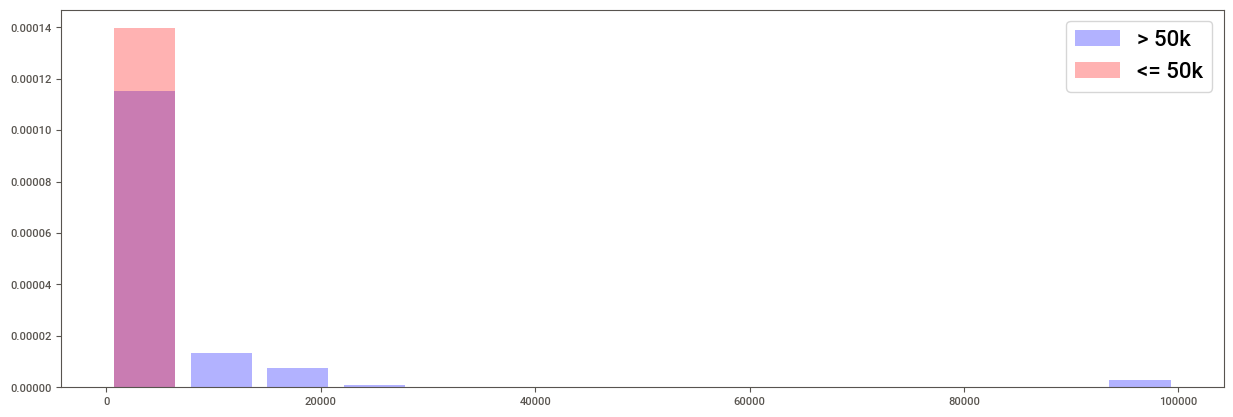

In [10]:
plt.figure(figsize=(15,5))

minimo = treino.capital_gain.min()
maximo = treino.capital_gain.max()
nbins=15
bins = np.linspace(minimo,maximo,nbins)

plt.hist(treino.loc[treino.yearly_wage==0].capital_gain, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(treino.loc[treino.yearly_wage==1].capital_gain, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16);

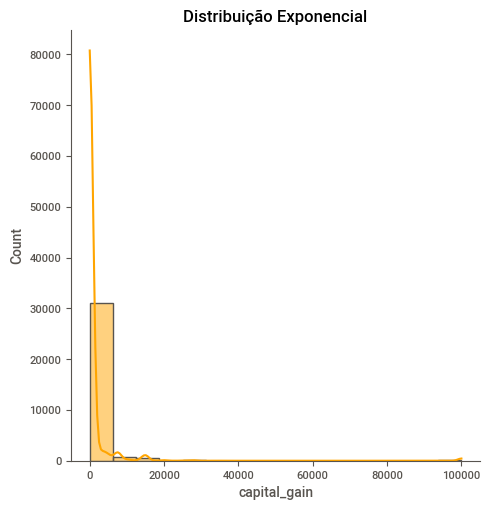

In [49]:
sns.displot(treino['capital_gain'], kde = True, color = 'orange').set(title='Distribuição Exponencial');

Podemos ver que a maoria dos valores está próximo a zero, e temos um outlier próximo de 1 milhão,
Poderemos tratar esse valor, para diminuir o impacto dessa discrepancia 

**Distribuição variável alvo pela variável capital_loss**

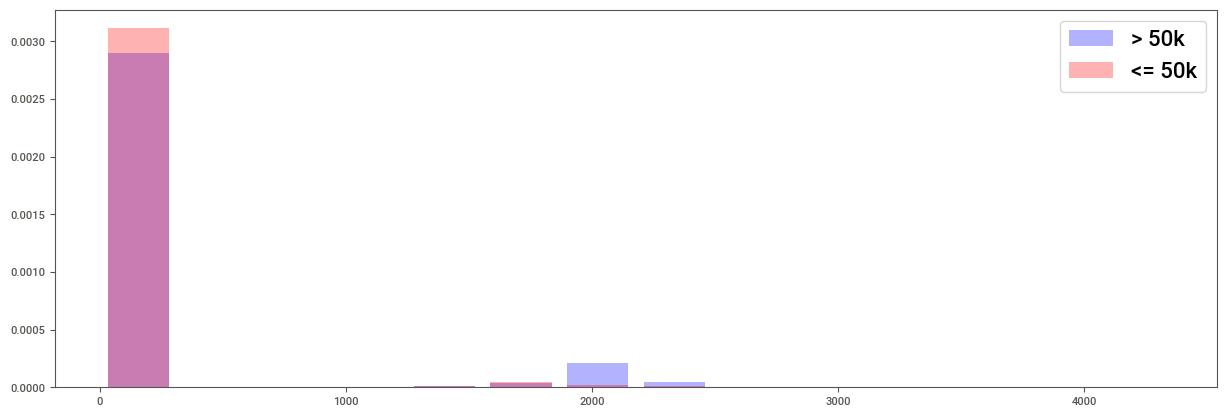

In [11]:
plt.figure(figsize=(15,5))

minimo = treino.capital_loss.min()
maximo = treino.capital_loss.max()
nbins=15
bins = np.linspace(minimo,maximo,nbins)

plt.hist(treino.loc[treino.yearly_wage==0].capital_loss, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(treino.loc[treino.yearly_wage==1].capital_loss, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16);

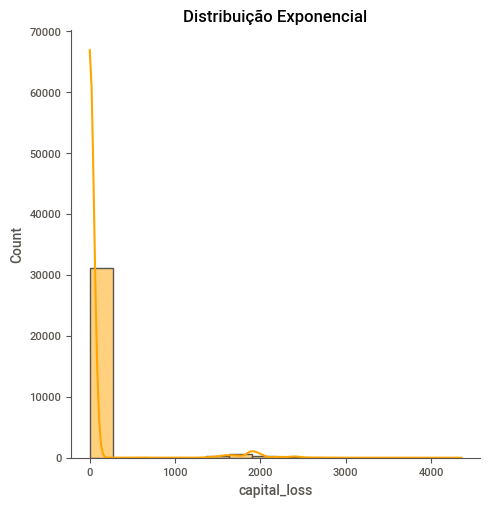

In [50]:
sns.displot(treino['capital_loss'], kde = True, color = 'orange').set(title='Distribuição Exponencial');

Podemos ver que a maioria dos valores está próximo a zero , mas possuimos alguns valores,
Próximos a 4 mil 

**Distribuição variável alvo pela variável hours_per_week**

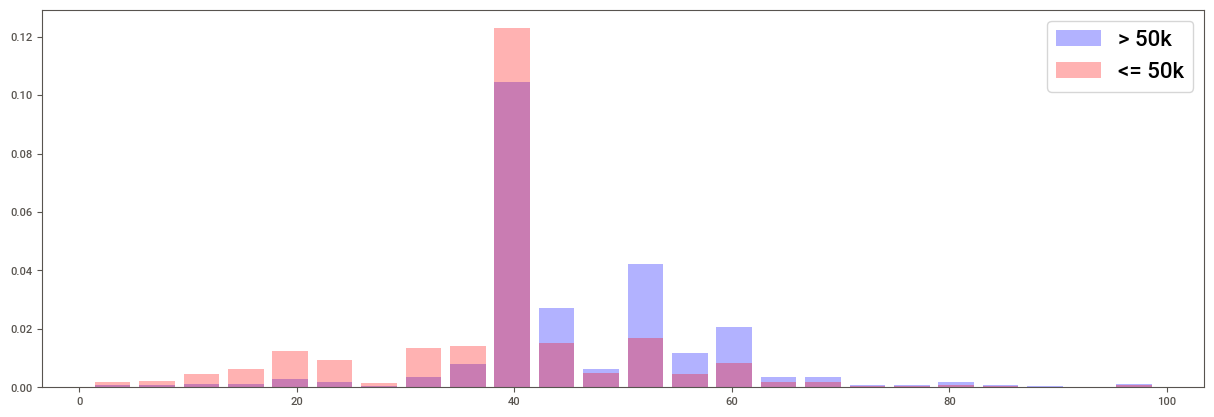

In [12]:
plt.figure(figsize=(15,5))

minimo = treino.hours_per_week.min()
maximo = treino.hours_per_week.max()
nbins=25
bins = np.linspace(minimo,maximo,nbins)

plt.hist(treino.loc[treino.yearly_wage==0].hours_per_week, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(treino.loc[treino.yearly_wage==1].hours_per_week, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16);

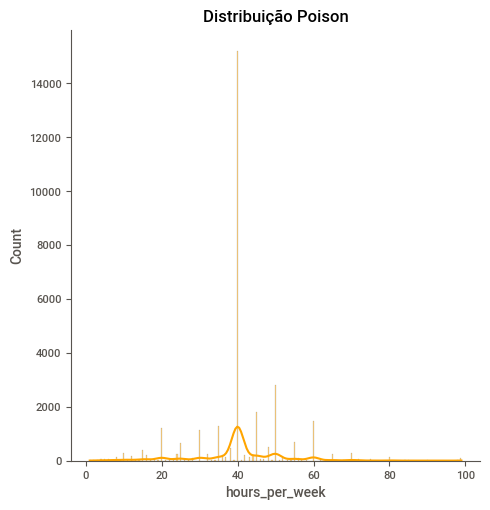

In [52]:
sns.displot(treino['hours_per_week'], kde = True, color = 'orange').set(title='Distribuição Poison');

Podemos ver que a maioria dos indivíduos trabalham 40 horas por semana,
mas temos dados que informar 99 horas trabalhadas por semana.

# **Análise das variaveis categóricas**

podemos começar com value_counts()

In [13]:
treino.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,0
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,0
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,0


In [14]:
treino['workclass'].value_counts(dropna=False, normalize = True), treino['workclass'].value_counts()

( Private             0.697052
  Self-emp-not-inc    0.078041
  Local-gov           0.064281
  ?                   0.056388
  State-gov           0.039834
  Self-emp-inc        0.034275
  Federal-gov         0.029484
  Without-pay         0.000430
  Never-worked        0.000215
 Name: workclass, dtype: float64,  Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1297
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: workclass, dtype: int64)

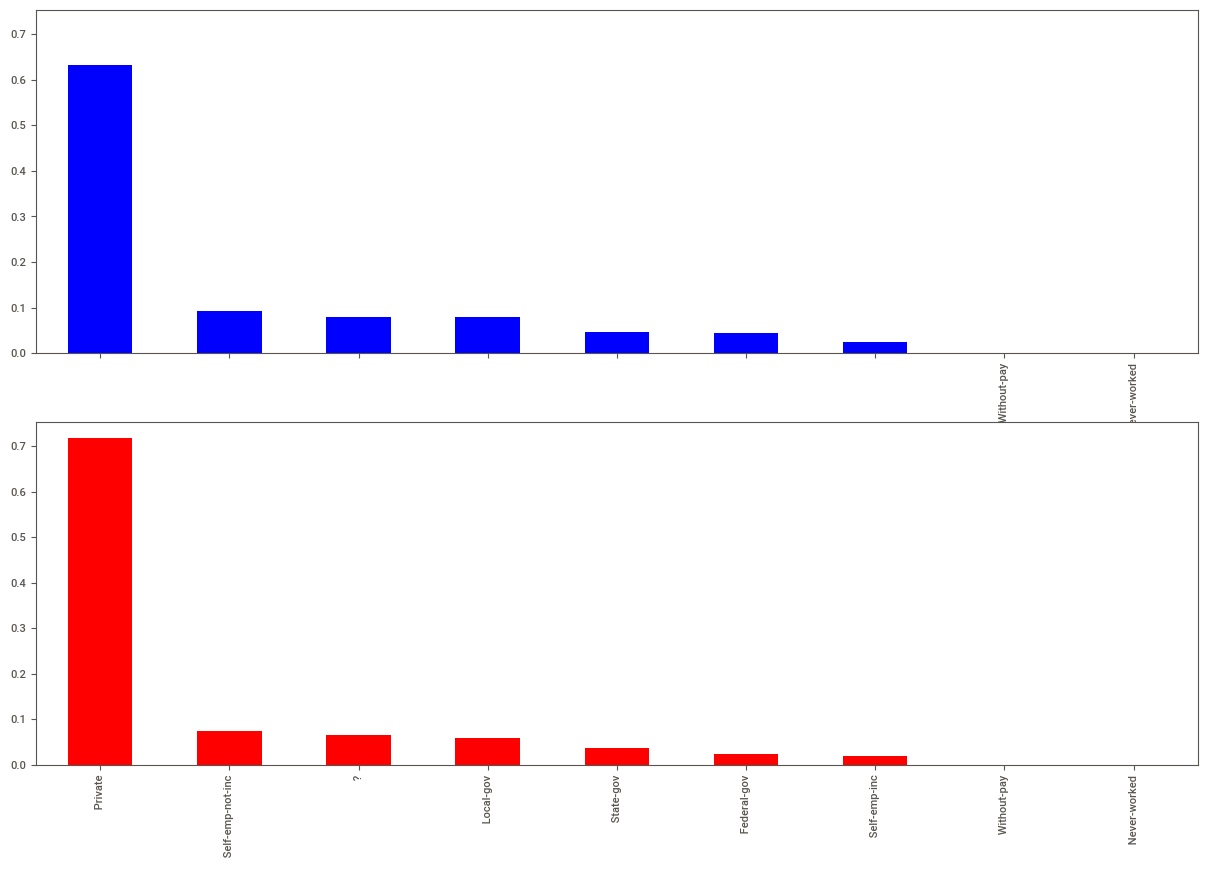

In [15]:
#Análise variável categórica Workclass
plt.figure(figsize=(15,2*5))
# 2 linhas, 1 coluna, gráfico 1
ax1 = plt.subplot(2,1,1)
treino.loc[treino.yearly_wage==0].workclass.value_counts(dropna=False,normalize=True).plot(ax=ax1,kind='bar',color='b')

# 2 linhas, 1 coluna, gráfico 2, e compartilha a mesma escala dos eixos x e y
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
treino.loc[treino.yearly_wage==1].workclass.value_counts(dropna=False,normalize=True).plot(ax=ax2,kind='bar',color='r');

Temos alguns dados sem classe definida, os dados aparecem com '?',
Podemos imputar a classe mais comum 'Private', para não termos mais esse valor

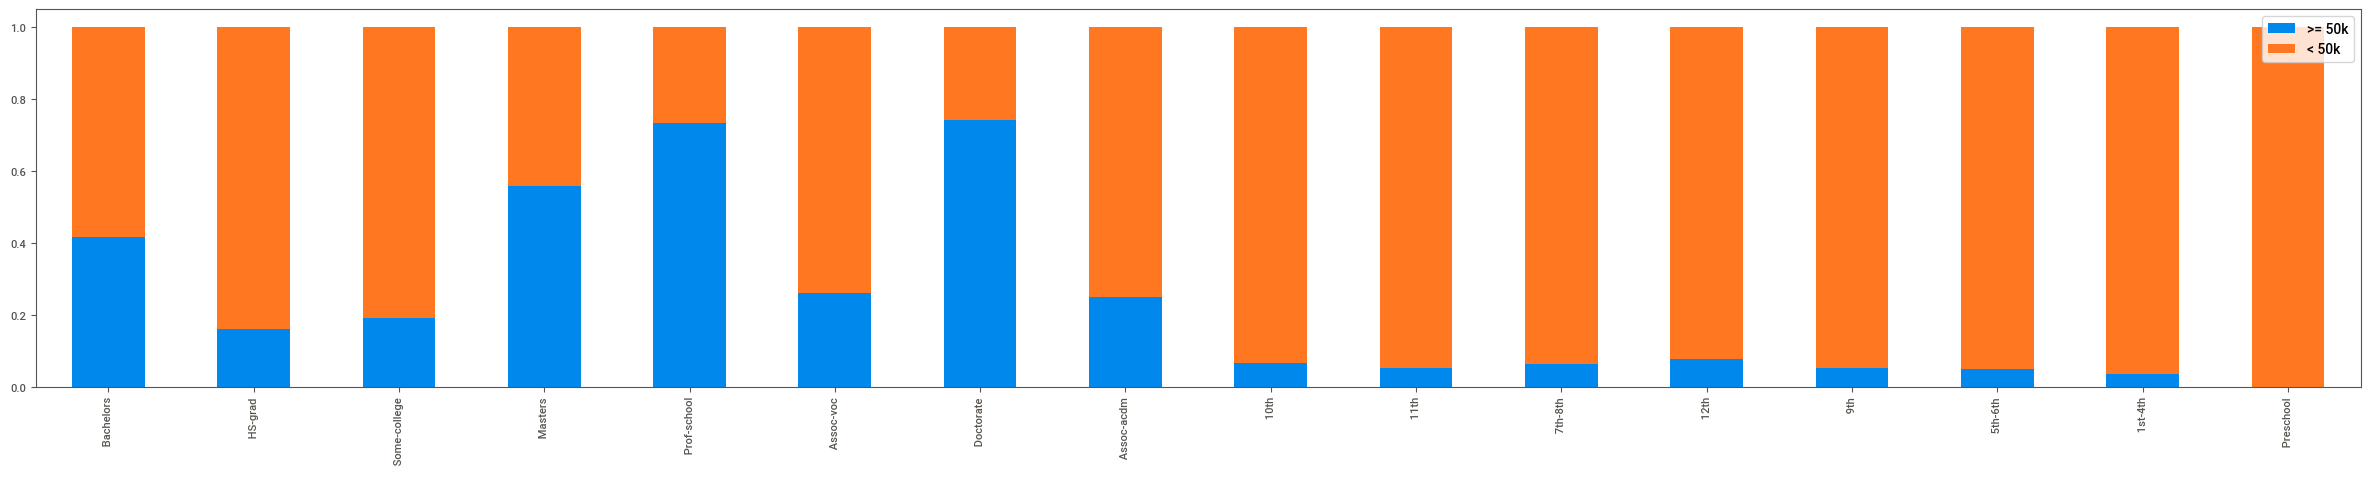

In [16]:
# Gráfico de barras empilhadas education 
cnt_0 = treino.loc[treino.yearly_wage==0].education.value_counts(dropna=False)
cnt_1 = treino.loc[treino.yearly_wage==1].education.value_counts(dropna=False)

#Unindo em uma tabela
pd.concat([cnt_0.rename('>= 50k'),cnt_1.rename('< 50k')],axis=1)
#Na linha preschool temos NaN, iremos preencher com (Zero)
pd.concat([cnt_0.rename('>= 50k'),cnt_1.rename('< 50k')],axis=1).fillna(0)

#Próximo passo normalizar os valores 
aux = pd.concat([cnt_0.rename('>= 50k'),cnt_1.rename('< 50k')],axis=1).fillna(0)
aux = aux.div(aux.sum(axis='columns'),axis='rows')

# plotando o gráfico 
plt.figure(figsize=(30,5))
ax = plt.subplot(1,1,1)
aux.plot(ax=ax,kind='bar',stacked=True);

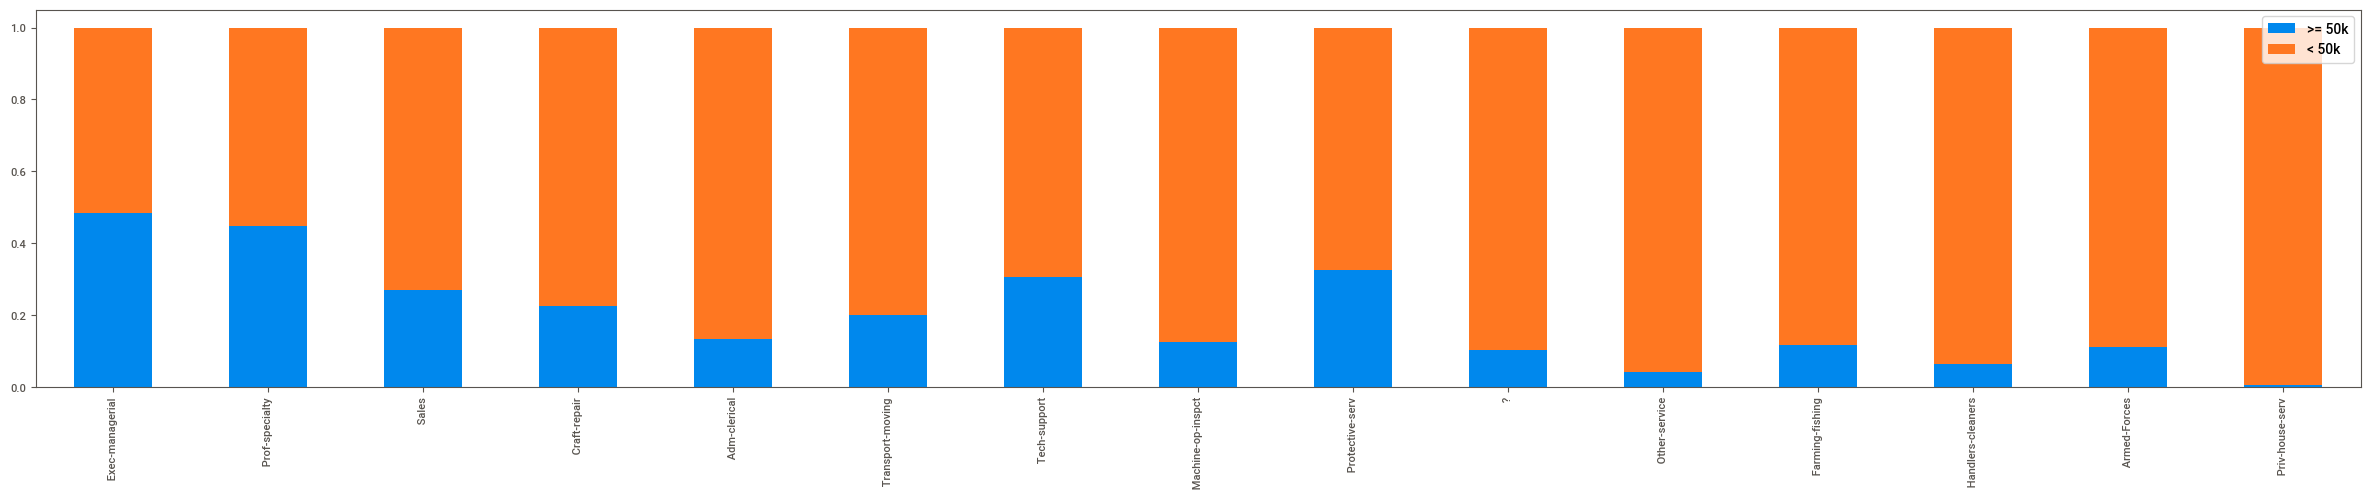

In [17]:
# Gráfico de barras empilhadas Ocupation
cnt_2 = treino.loc[treino.yearly_wage==0].occupation.value_counts(dropna=False)
cnt_3 = treino.loc[treino.yearly_wage==1].occupation.value_counts(dropna=False)

pd.concat([cnt_2.rename('>= 50k'),cnt_3.rename('< 50k')],axis=1)
aux1 = pd.concat([cnt_2.rename('>= 50k'),cnt_3.rename('< 50k')],axis=1).fillna(0)


aux1 = aux1.div(aux1.sum(axis='columns'),axis='rows')

plt.figure(figsize=(30,5))
ax1 = plt.subplot(1,1,1)
aux1.plot(ax=ax1,kind='bar',stacked=True);

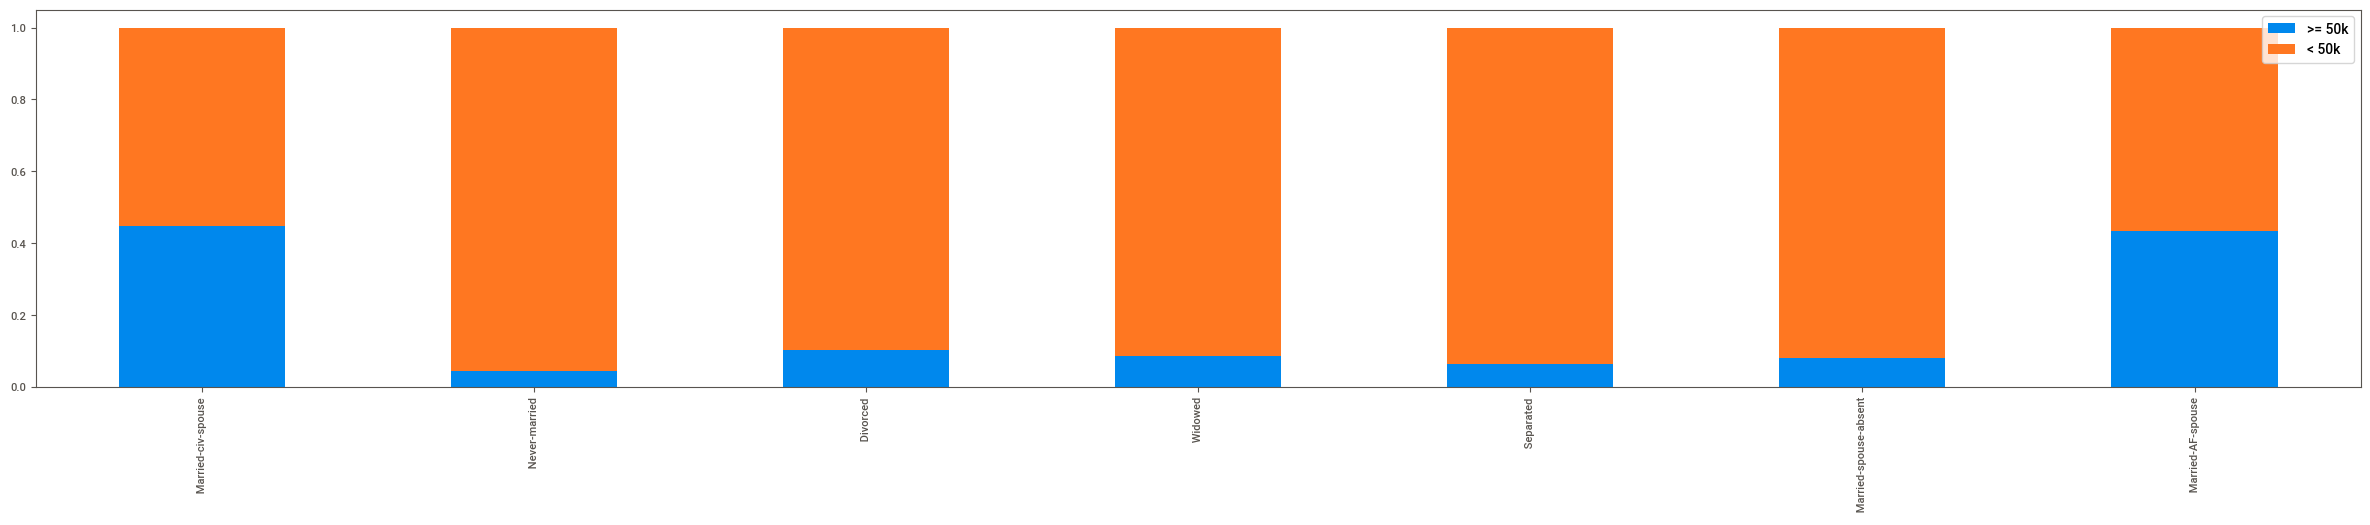

In [18]:
# # Gráfico de barras empilhadas marital_status

cnt_4 = treino.loc[treino.yearly_wage==0].marital_status.value_counts(dropna=False)
cnt_5 = treino.loc[treino.yearly_wage==1].marital_status.value_counts(dropna=False)

pd.concat([cnt_4.rename('>= 50k'),cnt_5.rename('< 50k')],axis=1)
aux2 = pd.concat([cnt_4.rename('>= 50k'),cnt_5.rename('< 50k')],axis=1).fillna(0)

aux2 = aux2.div(aux2.sum(axis='columns'),axis='rows')

plt.figure(figsize=(30,5))
ax2 = plt.subplot(1,1,1)
aux2.plot(ax=ax2,kind='bar',stacked=True);

# Correlação de variáveis e importância de variáveis

podemos ver que temos um valor que não faz sentido. 
tendo em vista que se o indíviduo é 'Marido' isso implica que é 'Homem'
porém temos um valor igual a Mulher

In [19]:
treino.loc[treino['relationship']==' Husband'].sex.value_counts()

 Male      13192
 Female        1
Name: sex, dtype: int64

Também temos dois valores inconsistentes,
o ideal é contatar a a área de negócios, para entender o motivo desses valores, antes de tomar qualquer atitude 

In [20]:
treino.loc[treino['relationship']==' Wife'].sex.value_counts()

 Female    1566
 Male         2
Name: sex, dtype: int64

In [21]:
origX = treino.drop('yearly_wage', axis = 1)
origy = treino['yearly_wage']

#tratamento de variáveis para o teste 

origX['workclass']        = origX['workclass'].map({' Self-emp-not-inc' :0,  ' Private' :1, ' State-gov' :2, ' Federal-gov' :3,' Local-gov' :4, ' ?' :5, ' Self-emp-inc' :6, ' Without-pay' :7,' Never-worked' :8 })
origX['education']        = origX['education'].map({' Bachelors' :0, ' HS-grad' :1, ' 11th' :2, ' Masters' :3, ' 9th' :4,' Some-college' :5, ' Assoc-acdm' :6, ' Assoc-voc' :7, ' 7th-8th' :8,' Doctorate' :9, ' Prof-school' :10, ' 5th-6th' :11, ' 10th' :12, ' 1st-4th' :13,' Preschool' :14, ' 12th' :15})
origX['marital_status']   = origX['marital_status'].map({' Married-civ-spouse' :0, ' Divorced' :1, ' Married-spouse-absent' :2,' Never-married' :3, ' Separated' :4, ' Married-AF-spouse' :5, ' Widowed' :6})
origX['occupation']       = origX['occupation'].map({' Exec-managerial' :0, ' Handlers-cleaners' :1, ' Prof-specialty' :2,' Other-service' :3, ' Adm-clerical' :4, ' Sales' :5, ' Craft-repair':6,' Transport-moving' :7, ' Farming-fishing' :8, ' Machine-op-inspct' :9, ' Tech-support' :10, ' ?' :11, ' Protective-serv' :12, ' Armed-Forces' :13, ' Priv-house-serv' :14})
origX['relationship']     = origX['relationship'].map({' Husband' :0, ' Not-in-family' :1, ' Wife' :2, ' Own-child' :3, ' Unmarried' :4,' Other-relative' :5})
origX['race']             = origX['race'].map({' White' :0, ' Black' :1, ' Asian-Pac-Islander' :2, ' Amer-Indian-Eskimo' :3,' Other' :4})
origX['sex']              = origX['sex'].map({' Male' :0, ' Female' :1})
origX['native_country']   = origX['native_country'].map({' United-States' :0, ' Cuba' :1, ' Jamaica':2, ' India' :3, ' ?' :4, ' Mexico' :5,' South' :6, ' Puerto-Rico' :7, ' Honduras' :8, ' England' :9, ' Canada' :10,' Germany' :11, ' Iran' :12, ' Philippines' :13, ' Italy' :14, ' Poland' :15,' Columbia' :16, ' Cambodia' :17, ' Thailand' :18, ' Ecuador' :19, ' Laos' :20,' Taiwan' :21, ' Haiti' :22, ' Portugal' :23, ' Dominican-Republic' :24,' El-Salvador' :25, ' France' :26, ' Guatemala' :27, ' China' :28, ' Japan' :29,' Yugoslavia' :30, ' Peru' :31, ' Outlying-US(Guam-USVI-etc)' :32, ' Scotland' :33,' Trinadad&Tobago' :34, ' Greece' :35, ' Nicaragua' :36, ' Vietnam' :37, ' Hong' :38,' Ireland' :39, ' Hungary' :40, ' Holand-Netherlands' :41})

from sklearn.ensemble import RandomForestClassifier

modelo_base = RandomForestClassifier(max_depth = 5)
modelo_base.fit(origX, origy)

RandomForestClassifier(max_depth=5)

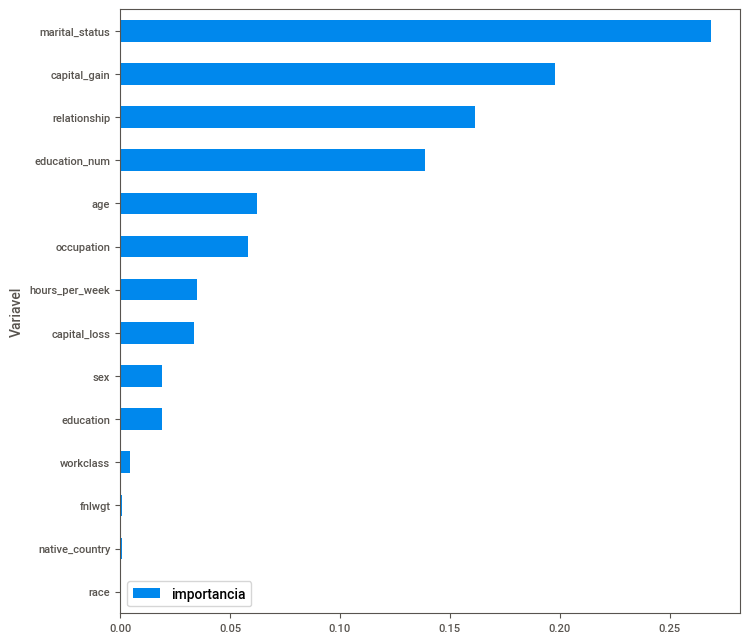

In [22]:
variaveis = pd.DataFrame()
variaveis['Variavel'] = origX.columns
variaveis['importancia'] = modelo_base.feature_importances_
variaveis.sort_values(by = 'importancia', ascending = True, inplace = True)
variaveis.set_index('Variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(8,8))

Optei pela exclusão destas duas variáveis, pois seus impactos são baixos. E a utilização da variável 'Race' por exemplo
poderia causar um viés no modelo, já que essa classe está desbalanceada, possuindo muito mais dados de indivíduos brancos.

In [23]:
origX.drop('race', axis = 1, inplace = True)
origX.drop('native_country', axis = 1, inplace = True)

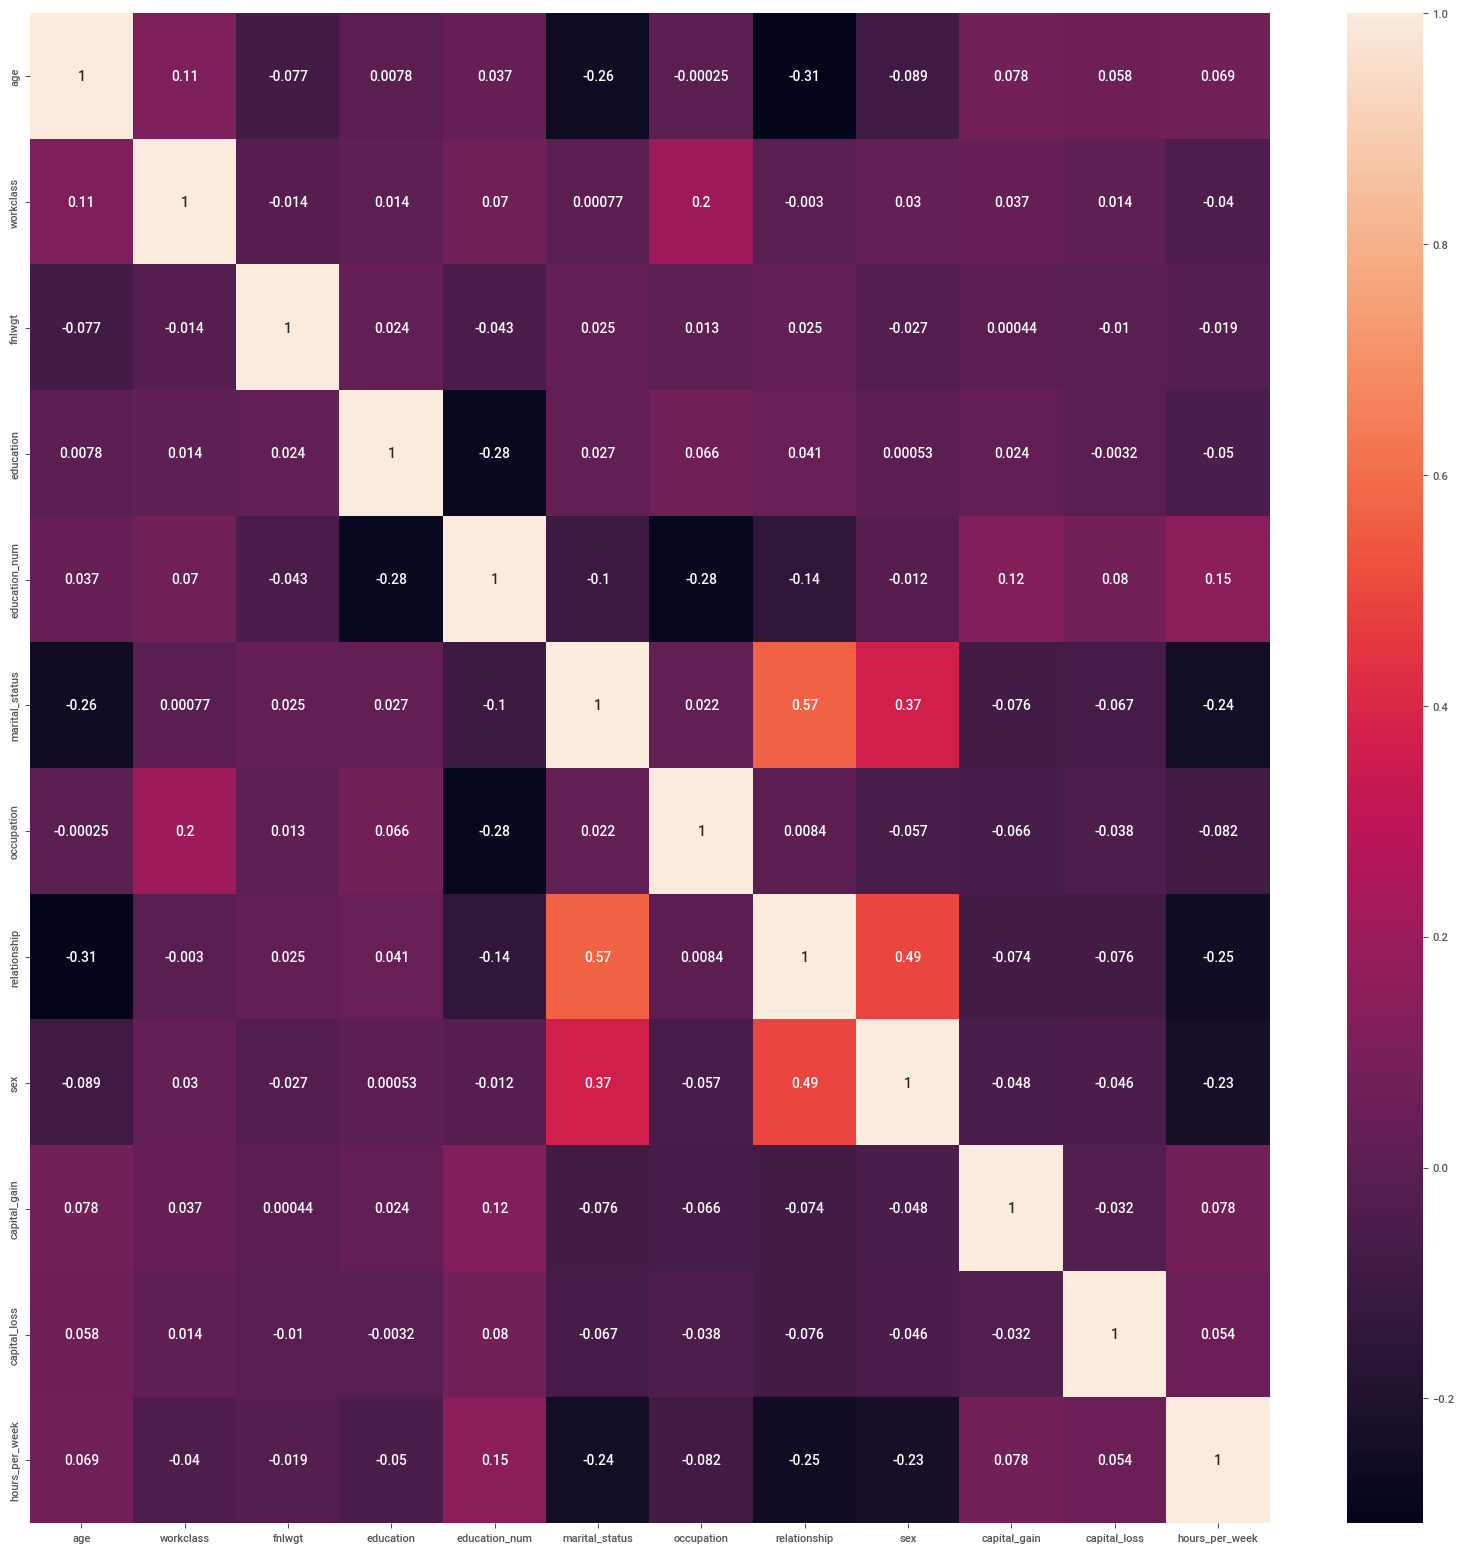

In [24]:
#Verificando se há correlação entre as variáveis selecionadas
import seaborn as sns
plt.figure(figsize = [20,20])
sns.heatmap(origX.corr(),annot = True);

Tipicamente valores maiores que 0.70 ou 0.80 em módulo (isto é, positivo ou negativo) são correlações grandes.

Ao checar a importância das variáveis, voltaremos a esse gráfico, e iremos verifiar se variáveis de pouca importância aparecem com correlação muito alta. Se sim, vale a pena REMOVER uma delas, treinar de novo, e verificar a importância novamente.

# Conjunto teste, analisando distribuições

O objetivo desta seção da análise, é fazer uma comparação visual entre os dados de treino e de teste, adim de compreender se os dados de testes serão semlhantes aos dados que o modelo foi treinado.

In [25]:
teste = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/Desafio_INDICIUM/wage_test.csv')
teste = teste.drop('Unnamed: 0', axis = 1)
teste.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


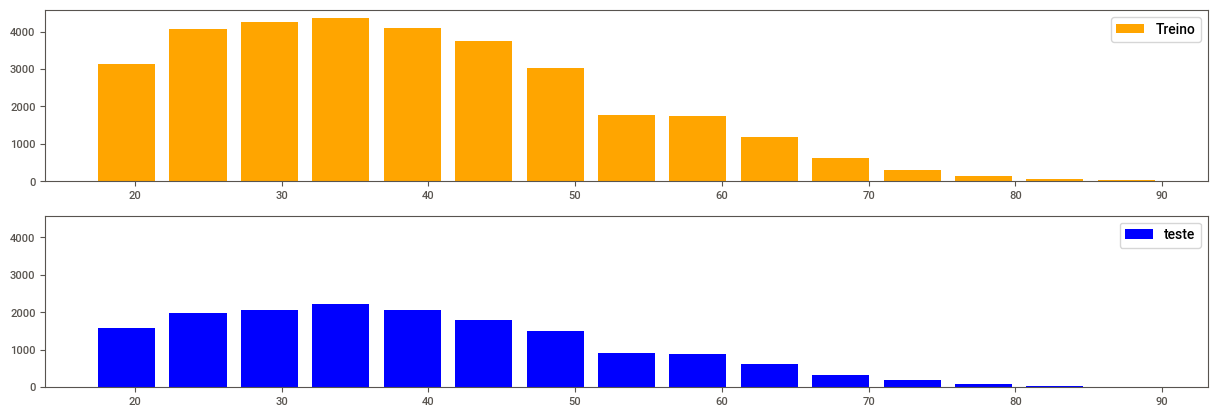

In [26]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['age'], bins = 15, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['age'], bins = 15, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

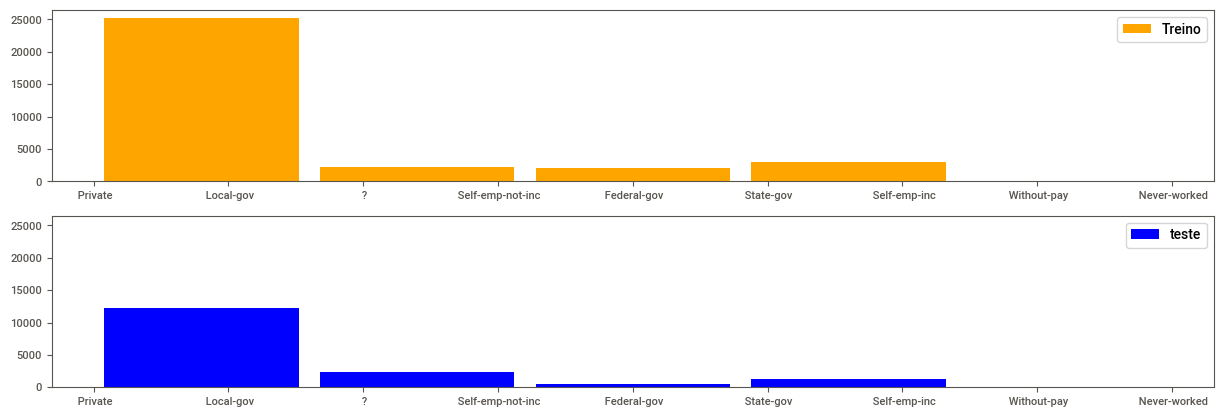

In [54]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['workclass'], bins = 5, rwidth = 0.9, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['workclass'], bins = 5, rwidth = 0.9, label = 'teste', color = 'blue')
ax2.legend();

In [28]:
treino['workclass'].value_counts(), teste['workclass'].value_counts()

( Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1297
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: workclass, dtype: int64,  Private             11209
  Self-emp-not-inc     1321
  Local-gov            1043
  ?                     963
  State-gov             683
  Self-emp-inc          579
  Federal-gov           472
  Without-pay             7
  Never-worked            3
 Name: workclass, dtype: int64)

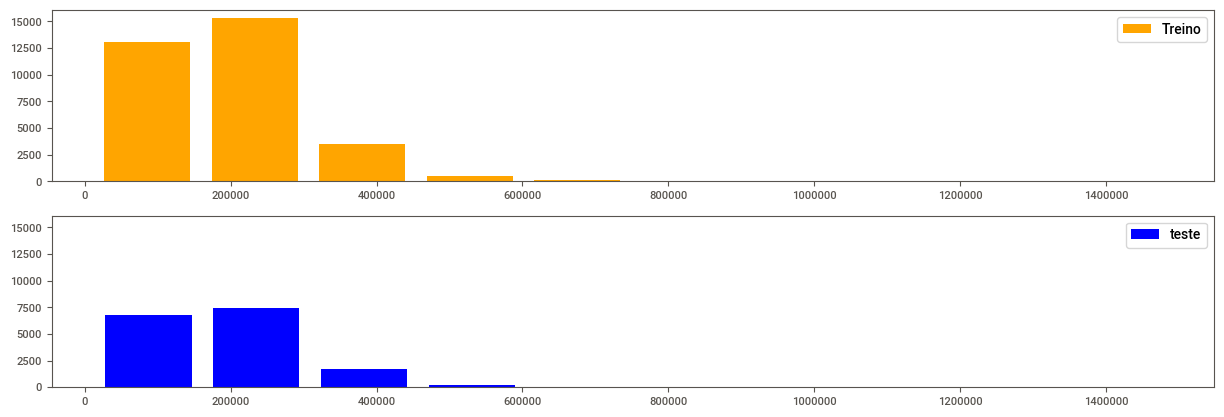

In [29]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['fnlwgt'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['fnlwgt'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

In [30]:
treino['fnlwgt'].describe(), teste['fnlwgt'].describe()

(count    3.256000e+04
 mean     1.897818e+05
 std      1.055498e+05
 min      1.228500e+04
 25%      1.178315e+05
 50%      1.783630e+05
 75%      2.370545e+05
 max      1.484705e+06
 Name: fnlwgt, dtype: float64, count    1.628000e+04
 mean     1.894334e+05
 std      1.057177e+05
 min      1.349200e+04
 25%      1.167162e+05
 50%      1.778295e+05
 75%      2.383840e+05
 max      1.490400e+06
 Name: fnlwgt, dtype: float64)

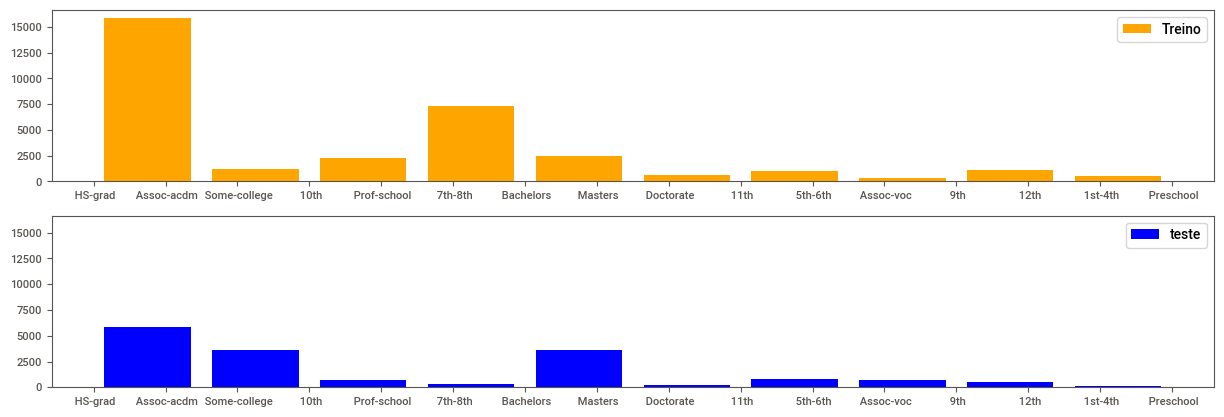

In [31]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['education'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['education'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

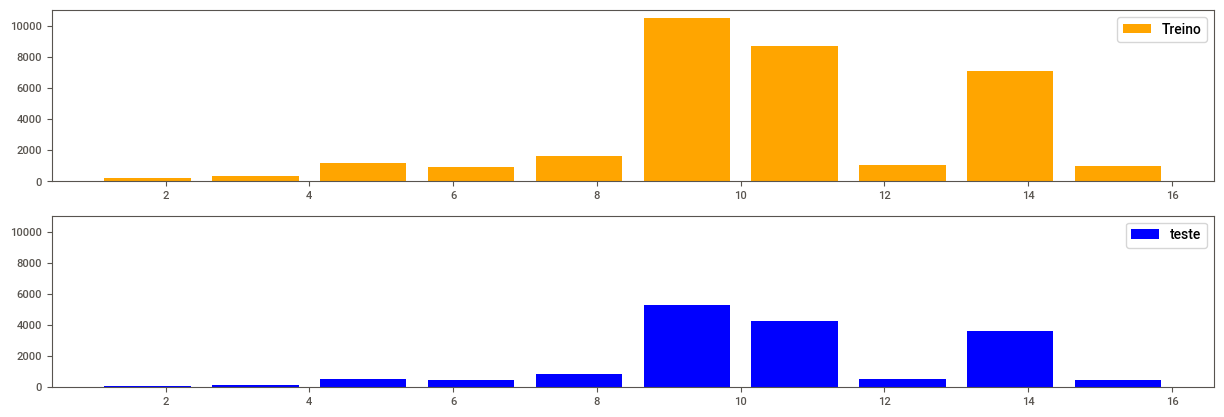

In [32]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['education_num'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['education_num'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

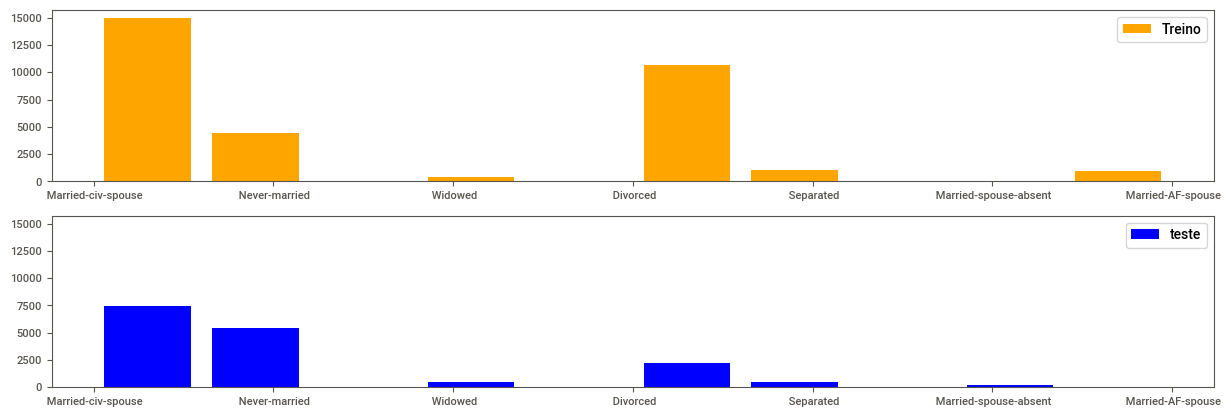

In [33]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['marital_status'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['marital_status'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

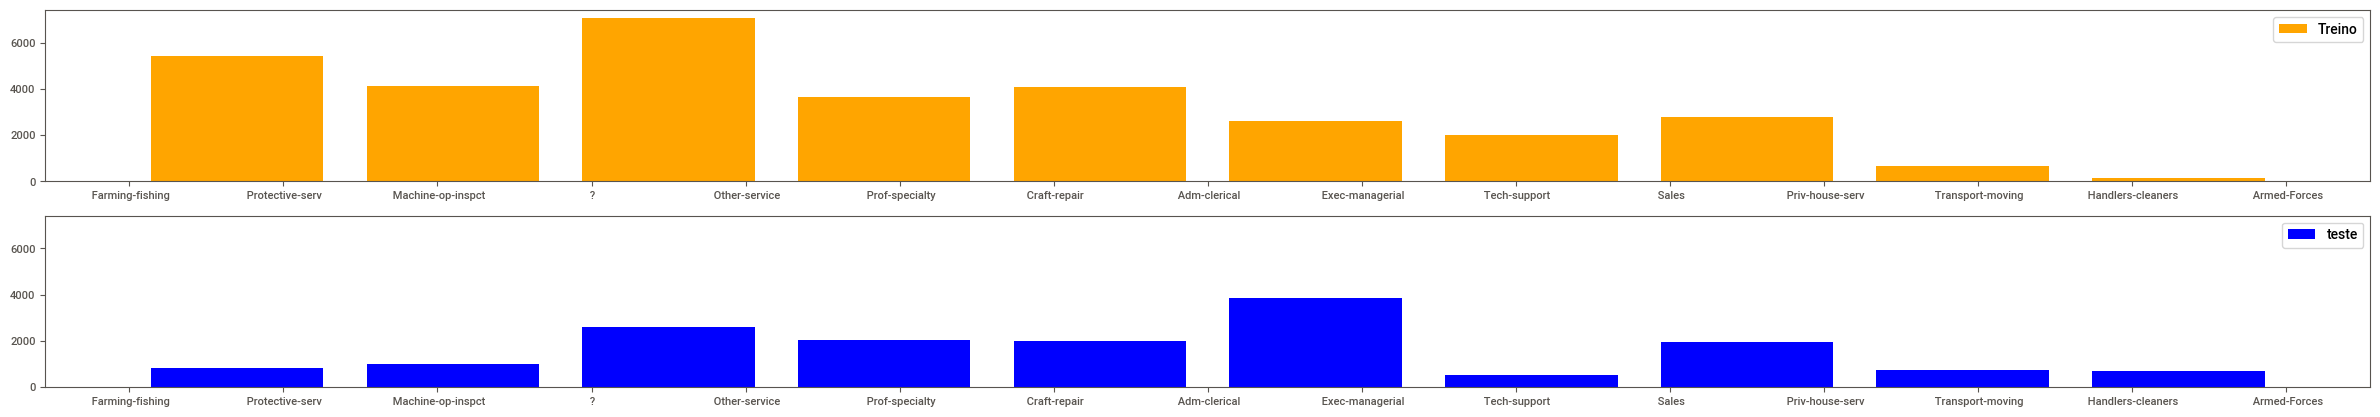

In [34]:
plt.figure(figsize=(30,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['occupation'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['occupation'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

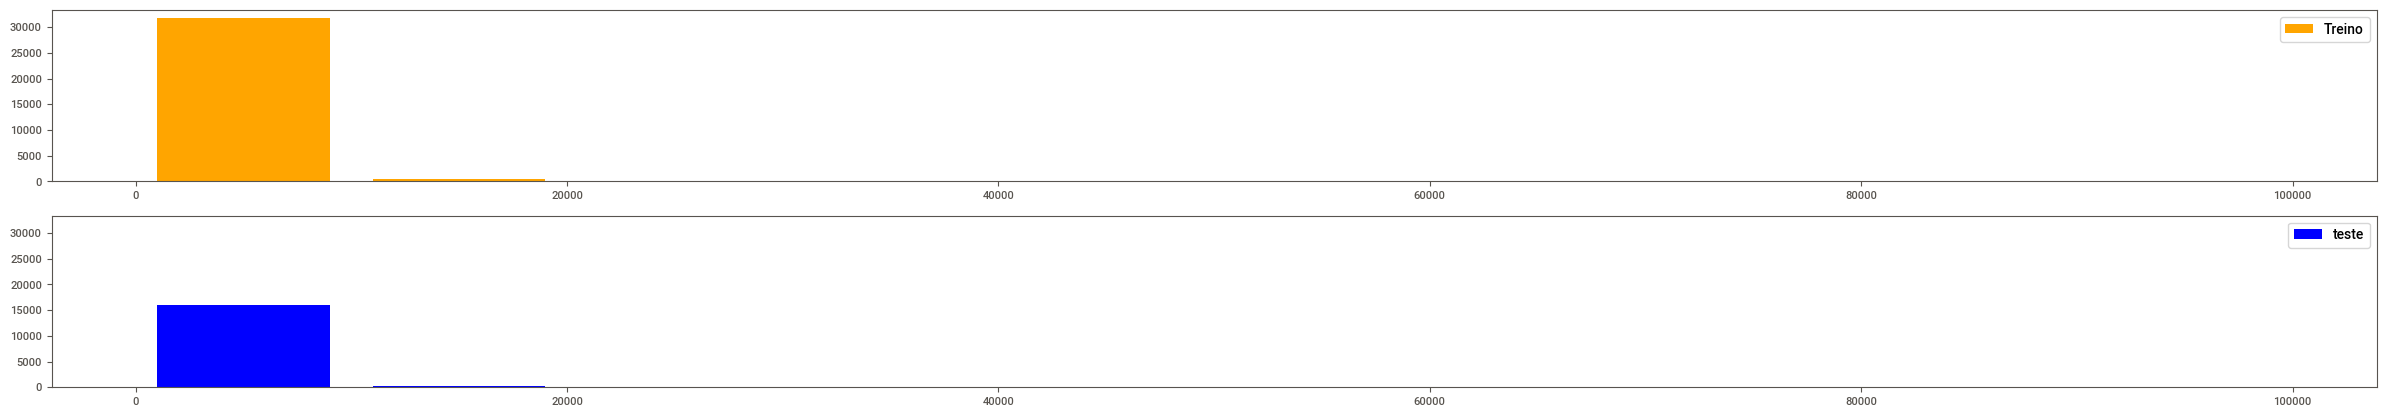

In [35]:
plt.figure(figsize=(30,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['capital_gain'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['capital_gain'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

In [36]:
treino['capital_gain'].describe(), teste['capital_gain'].describe()

(count    32560.000000
 mean      1077.615172
 std       7385.402999
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max      99999.000000
 Name: capital_gain, dtype: float64, count    16280.00000
 mean      1081.97156
 std       7584.16416
 min          0.00000
 25%          0.00000
 50%          0.00000
 75%          0.00000
 max      99999.00000
 Name: capital_gain, dtype: float64)

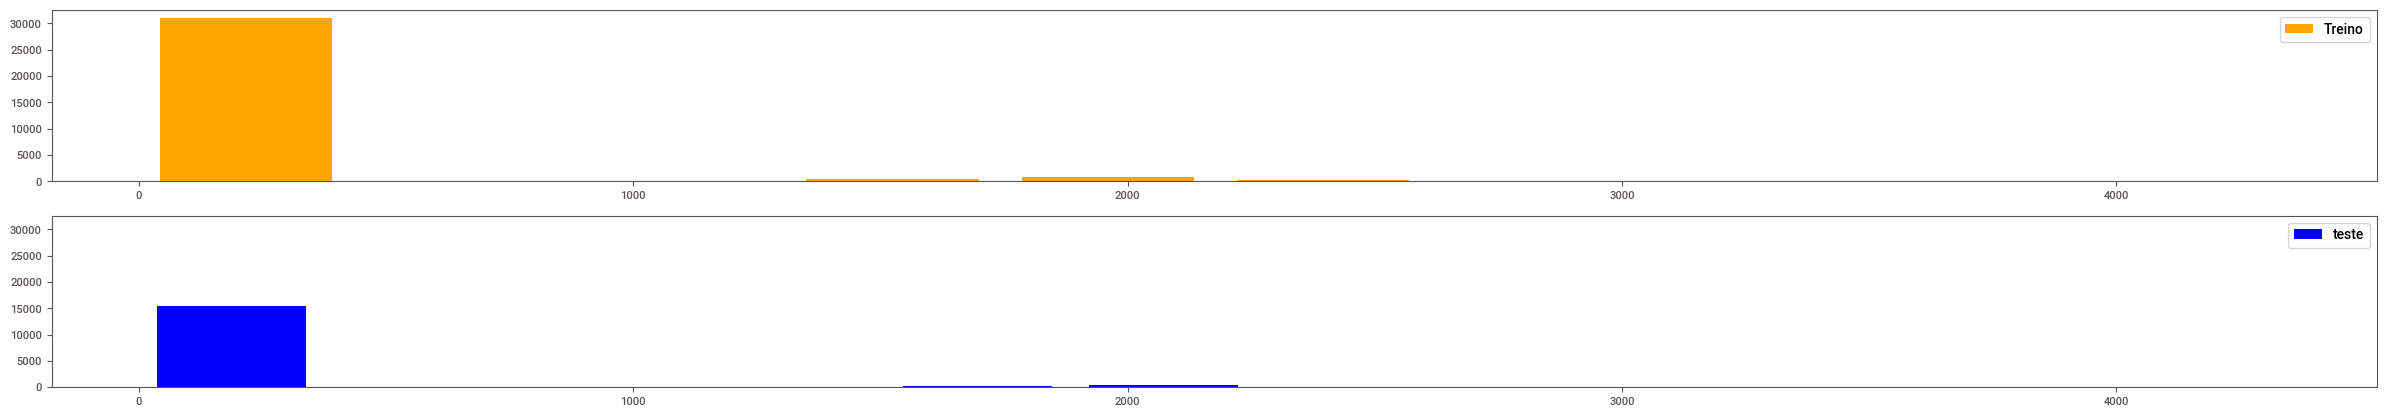

In [37]:
plt.figure(figsize=(30,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['capital_loss'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['capital_loss'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

In [38]:
treino['capital_loss'].describe(), teste['capital_loss'].describe()

(count    32560.000000
 mean        87.306511
 std        402.966116
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max       4356.000000
 Name: capital_loss, dtype: float64, count    16280.000000
 mean        87.904668
 std        403.117078
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max       3770.000000
 Name: capital_loss, dtype: float64)

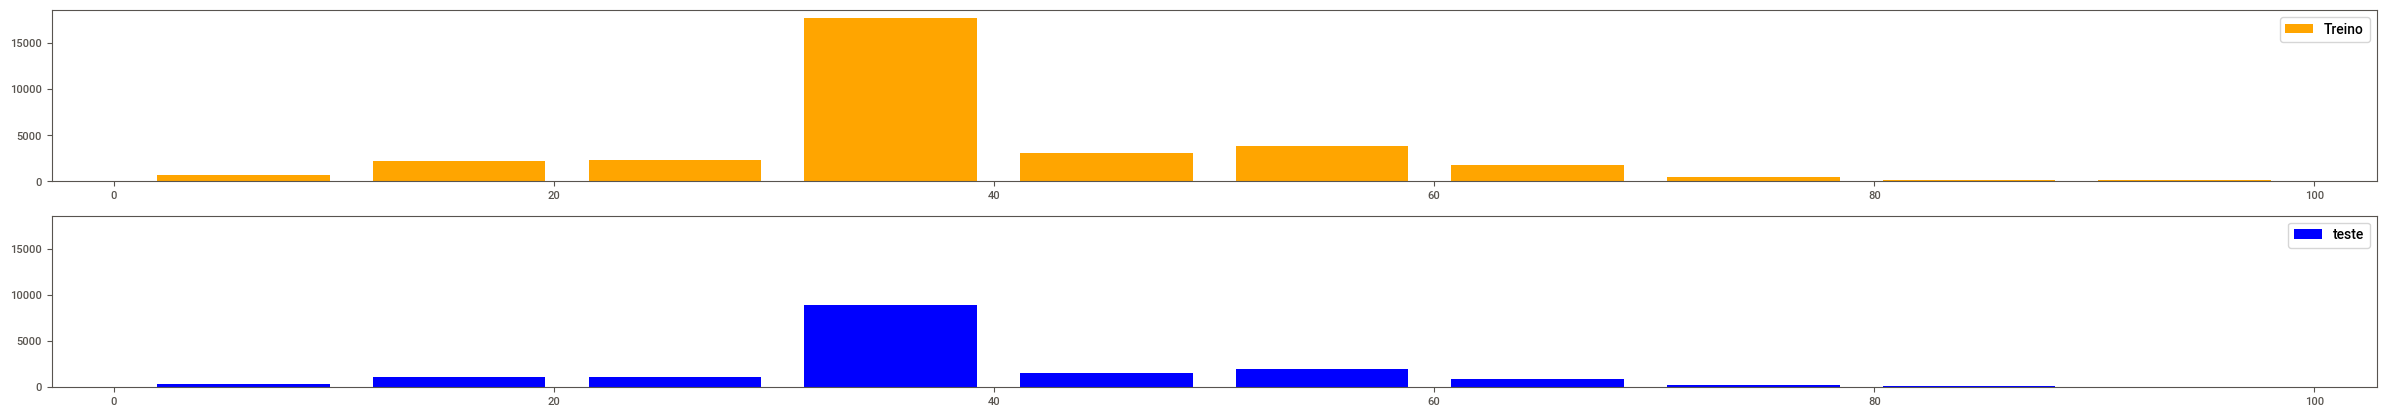

In [39]:
plt.figure(figsize=(30,5))
ax1 = plt.subplot(2,1,1)
plt.hist(treino['hours_per_week'], bins = 10, rwidth = 0.8, label = 'Treino', color = 'orange')
ax1.legend()
ax2 = plt.subplot(2,1,2,sharex=ax1, sharey=ax1)
plt.hist(teste['hours_per_week'], bins = 10, rwidth = 0.8, label = 'teste', color = 'blue')
ax2.legend();

**No geral nossos dados de teste possuem uma distribuição bastante semelhante com os dados de treino, o que facilitará nossa classificação pelo nosso modelo. Optei pela não remoção dos outliers, pois eles permanecem nos dados de teste, como podemos ver nas variáveis (fnlwgt, capital_gain e capital_loss)**